In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


# Hypothesis and Research Question

Question: Can international gender indicators predict the rate of female child marriage in a country?

H0: Gender indicators have no power in predicting female child marriage. 
HA: Gender indicators are a successful way of measuring female child marriage rates within a country.

Import data from the world bank development indicators on gender and empowerment. This data is the average from 2000-2015 in order to ensure the inclusion of the maximum number of countries in the dataset. Import region and subregion variables for each country.I have also created a dataset to indicate whether or not a country enacts Sharia law in any way as sourced by the Huffington Post article below. 
http://www.huffingtonpost.com/2013/07/29/sharia-law-usa-states-ban_n_3660813.html

In [2]:
gender=pd.read_stata('C:\Users\miran\Desktop\ECON628-01-milambert\gender_avg.dta')           

In [3]:
region=pd.read_excel('C:\Users\miran\Desktop/ECON628-01-milambert/region.xlsx')

In [4]:
sharia=pd.read_excel('C:\Users\miran\Desktop/ECON628-01-milambert/sharia.xlsx')

In [5]:
gender.head()
##155 explanatory features at first

,CountryName,CountryCode,Accountatafinancialinstituti,Adolescentfertilityratebirth,AgeatfirstmarriagefemaleS,Agedependencyratioofworki,Birthratecrudeper1000peo,Borrowedanymoneyinthepasty,Borrowedforeducationorschool,Borrowedforhealthormedicalp,...,Unmetneedforcontraception,Usedanaccountatafinanciali,FE,Usedelectronicpaymentstomake,UsedtheInternettopaybillso,Vulnerableemploymentfemale,Wageandsalariedworkersfemal,Wantedfertilityratebirthspe,Womanstestimonycarriesthesa,Womenwhowerefirstmarriedby
0,Albania,ALB,28.133420,19.617293,24.133333,51.512443,13.072333,58.11425,13.173640,25.626750,...,7.100000,1.930272,6.403857,3.556605,2.205266,65.175000,33.757143,1.900000,1,8.550000
1,Algeria,DZA,30.239130,10.409600,29.433333,52.558330,22.260600,24.64641,3.583416,9.061450,...,10.400000,1.354573,0.060773,1.164757,1.838586,33.060000,56.480000,NaN,1,2.150000
2,Angola,AGO,30.629995,189.690307,20.400000,101.843189,48.602133,28.71658,7.921198,11.780480,...,NaN,6.675225,8.099582,18.592000,0.557582,NaN,NaN,NaN,1,NaN
3,Argentina,ARG,41.335460,63.355747,24.600000,58.293715,18.536467,17.21668,0.621846,1.844407,...,NaN,2.445116,1.049177,5.858636,6.449012,17.921429,79.492856,NaN,1,NaN
4,Armenia,ARM,16.246340,29.573973,23.460000,48.213821,13.709333,48.46550,4.835610,17.931540,...,16.966667,2.346563,0.682374,2.121817,3.708283,31.400000,51.983333,1.566667,1,12.066667


In [6]:
gender.columns.tolist()

['CountryName',
 'CountryCode',
 'Accountatafinancialinstituti',
 'Adolescentfertilityratebirth',
 'AgeatfirstmarriagefemaleS',
 'Agedependencyratioofworki',
 'Birthratecrudeper1000peo',
 'Borrowedanymoneyinthepasty',
 'Borrowedforeducationorschool',
 'Borrowedforhealthormedicalp',
 'Borrowedfromaprivateinformal',
 'Borrowedfromastorebybuying',
 'Borrowedfromafinancialinstit',
 'Borrowedfromfamilyorfriends',
 'Borrowedtostartoperateore',
 'Causeofdeathbycommunicable',
 'U',
 'Causeofdeathbyinjuryages',
 'W',
 'Causeofdeathbynoncommunica',
 'Y',
 'Comingupwithemergencyfunds',
 'AC',
 'AD',
 'Contraceptiveprevalenceanyme',
 'Contraceptiveprevalencemodern',
 'Costofstartupproceduresfem',
 'Creditcardusedinthepastyea',
 'Deathratecrudeper1000peo',
 'Debitcardinownnamefemale',
 'AQ',
 'Educationalattainmentcomplete',
 'AS',
 'AT',
 'AU',
 'Educationalattainmentnoschoo',
 'Employmentinagriculturefemal',
 'Employmentinindustryfemale',
 'Employmentinservicesfemale',
 'Employmenttopopulationrat

In [7]:
gender.shape

(138, 155)

In [8]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Columns: 155 entries, CountryName to Womenwhowerefirstmarriedby
dtypes: float64(148), int8(5), object(2)
memory usage: 163.5+ KB


In [9]:
gender.describe()
##missing variables mean quartiles cannot be estimated

,Accountatafinancialinstituti,Adolescentfertilityratebirth,AgeatfirstmarriagefemaleS,Agedependencyratioofworki,Birthratecrudeper1000peo,Borrowedanymoneyinthepasty,Borrowedforeducationorschool,Borrowedforhealthormedicalp,Borrowedfromaprivateinformal,Borrowedfromastorebybuying,...,Unmetneedforcontraception,Usedanaccountatafinanciali,FE,Usedelectronicpaymentstomake,UsedtheInternettopaybillso,Vulnerableemploymentfemale,Wageandsalariedworkersfemal,Wantedfertilityratebirthspe,Womanstestimonycarriesthesa,Womenwhowerefirstmarriedby
count,134.000000,138.000000,138.000000,138.000000,138.000000,127.000000,127.000000,127.000000,134.000000,127.000000,...,93.000000,127.000000,101.000000,127.000000,127.000000,114.000000,127.000000,62.000000,138.000000,88.000000
mean,46.604120,57.099525,24.419603,62.182015,22.580831,42.210851,8.024649,11.653433,3.578448,8.103773,...,18.165406,7.003691,2.953160,16.200161,15.993893,42.097612,58.176697,3.467266,0.920290,25.878454
std,32.119345,47.823787,3.355715,18.793472,11.725295,13.845490,6.527006,8.583242,3.727218,7.553365,...,9.651273,9.040692,4.093513,24.176440,21.691148,31.245219,31.261959,1.371276,0.271831,16.637173
min,1.380542,2.046160,16.775000,22.442934,8.466667,14.825890,0.621846,0.373684,0.000000,0.000000,...,1.700000,0.103943,0.000000,0.000000,0.000000,0.433333,1.500000,1.100000,0.000000,1.600000
25%,19.627085,16.622730,21.912500,48.773377,12.201333,32.451635,3.678913,5.453947,1.036430,2.929301,...,10.750000,1.950646,0.551325,1.209290,1.592534,12.923750,33.414286,2.316667,1.000000,12.129167
50%,37.053520,43.170493,23.662500,54.905685,21.123933,41.033410,6.271960,8.813710,2.246719,5.659836,...,17.200000,3.178708,1.429874,4.097694,4.948931,35.624615,64.714287,3.316667,1.000000,22.500000
75%,74.379831,84.327050,27.112500,76.034168,30.422517,48.849400,10.525870,17.255240,5.025416,10.715980,...,26.100000,6.904376,3.545247,19.263925,21.468375,68.575000,87.241666,4.500000,1.000000,36.260000
max,100.000000,212.720453,31.861538,107.975272,51.146133,86.655350,38.689540,41.313190,17.530800,33.532790,...,55.900000,37.161330,22.787900,86.463820,77.280880,96.300003,98.766665,7.100000,1.000000,75.400000


# EDA

In [10]:
##Rename important columns with clearer titles 
gender.rename(columns={
        'AgeatfirstmarriagefemaleS':'first_marriage',
        'Adolescentfertilityratebirth': 'adolescent_pregnancy',
        'Womenwhowerefirstmarriedby':'child_marriage',
        'Causeofdeathbyinjuryages':'death_byinjury',
        'CountryCode':'code',
        "Womanstestimonycarriesthesa": 'womans_testimony',
        'EI': 'female_male_unemployment',
        'U': 'deathby_communicable_disease_old',
        'W': 'death_byinjury_old',
        'Y': 'deathby_noncommunicable_disease_old'
        }, inplace=True)

In [11]:
##merge gender and sharia data

gender=gender.merge(sharia, on=['code'], how='left')

In [12]:
##Identify missing values
print gender.isnull().sum()
##There are a lot. Because of the sensitive or difficult to manner measures of many gender variables, we have many holes in the data. 

CountryName                             0
code                                    0
Accountatafinancialinstituti            4
adolescent_pregnancy                    0
first_marriage                          0
Agedependencyratioofworki               0
Birthratecrudeper1000peo                0
Borrowedanymoneyinthepasty             11
Borrowedforeducationorschool           11
Borrowedforhealthormedicalp            11
Borrowedfromaprivateinformal            4
Borrowedfromastorebybuying             11
Borrowedfromafinancialinstit            4
Borrowedfromfamilyorfriends             4
Borrowedtostartoperateore              11
Causeofdeathbycommunicable              3
deathby_communicable_disease_old        3
death_byinjury                          3
death_byinjury_old                      3
Causeofdeathbynoncommunica              3
deathby_noncommunicable_disease_old     3
Comingupwithemergencyfunds             11
AC                                     11
AD                                

In [13]:
##Cleaning dependent variable of missing values. 50 countries do not have our outcome variable in any of the 15 years 
##that we sampled to create the average because it is very difficult to 
##gather truthful responses. Unfortunately, these countries must be dropped. 
##on average about 25% of girls are married by 18 in the sample! 
gender1 = gender[np.isfinite(gender['child_marriage'])]

In [14]:
gender1.child_marriage.describe()

count    88.000000
mean     25.878454
std      16.637173
min       1.600000
25%      12.129167
50%      22.500000
75%      36.260000
max      75.400000
Name: child_marriage, dtype: float64

In [15]:
gender1.shape 

(88, 157)

In [16]:
##visualize missing variables after dropping countries without child marriage variable. You can see dropping those without 
##the child marriage indicator also made many other indicators have 0 missing observations!
print gender1.isnull().sum()

CountryName                             0
code                                    0
Accountatafinancialinstituti            2
adolescent_pregnancy                    0
first_marriage                          0
Agedependencyratioofworki               0
Birthratecrudeper1000peo                0
Borrowedanymoneyinthepasty              8
Borrowedforeducationorschool            8
Borrowedforhealthormedicalp             8
Borrowedfromaprivateinformal            2
Borrowedfromastorebybuying              6
Borrowedfromafinancialinstit            2
Borrowedfromfamilyorfriends             2
Borrowedtostartoperateore               8
Causeofdeathbycommunicable              1
deathby_communicable_disease_old        1
death_byinjury                          1
death_byinjury_old                      1
Causeofdeathbynoncommunica              1
deathby_noncommunicable_disease_old     1
Comingupwithemergencyfunds              8
AC                                      8
AD                                

In [17]:
##drop countries with less than 80 of the 155 features
gender1.dropna(thresh=80, inplace=True)

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
print gender1.isnull().sum()

CountryName                             0
code                                    0
Accountatafinancialinstituti            2
adolescent_pregnancy                    0
first_marriage                          0
Agedependencyratioofworki               0
Birthratecrudeper1000peo                0
Borrowedanymoneyinthepasty              8
Borrowedforeducationorschool            8
Borrowedforhealthormedicalp             8
Borrowedfromaprivateinformal            2
Borrowedfromastorebybuying              6
Borrowedfromafinancialinstit            2
Borrowedfromfamilyorfriends             2
Borrowedtostartoperateore               8
Causeofdeathbycommunicable              1
deathby_communicable_disease_old        1
death_byinjury                          1
death_byinjury_old                      1
Causeofdeathbynoncommunica              1
deathby_noncommunicable_disease_old     1
Comingupwithemergencyfunds              8
AC                                      8
AD                                

In [19]:
gender1.shape

(88, 157)

In [20]:
##Discovering which country is missing all of the Cause of death indicators

In [21]:
gender2=gender1[gender1.death_byinjury.isnull()]

In [22]:
gender2  ##it's the West Bank

,CountryName,code,Accountatafinancialinstituti,adolescent_pregnancy,first_marriage,Agedependencyratioofworki,Birthratecrudeper1000peo,Borrowedanymoneyinthepasty,Borrowedforeducationorschool,Borrowedforhealthormedicalp,...,FE,Usedelectronicpaymentstomake,UsedtheInternettopaybillso,Vulnerableemploymentfemale,Wageandsalariedworkersfemal,Wantedfertilityratebirthspe,womans_testimony,child_marriage,Country or Area,shariah
134,West Bank and Gaza,PSE,15.700515,67.149373,22.4,88.538091,36.041467,36.41088,6.98379,10.17411,...,2.102615,0.486648,1.310047,38.635714,60.492857,NaN,0,18.266667,State of Palestine,0


In [23]:
gender1=gender1[gender.code!='PSE'] ##drop West Bank

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [24]:
print gender1.isnull().sum()

CountryName                             0
code                                    0
Accountatafinancialinstituti            2
adolescent_pregnancy                    0
first_marriage                          0
Agedependencyratioofworki               0
Birthratecrudeper1000peo                0
Borrowedanymoneyinthepasty              8
Borrowedforeducationorschool            8
Borrowedforhealthormedicalp             8
Borrowedfromaprivateinformal            2
Borrowedfromastorebybuying              6
Borrowedfromafinancialinstit            2
Borrowedfromfamilyorfriends             2
Borrowedtostartoperateore               8
Causeofdeathbycommunicable              0
deathby_communicable_disease_old        0
death_byinjury                          0
death_byinjury_old                      0
Causeofdeathbynoncommunica              0
deathby_noncommunicable_disease_old     0
Comingupwithemergencyfunds              8
AC                                      8
AD                                

In [25]:
gender1.head(5)

,CountryName,code,Accountatafinancialinstituti,adolescent_pregnancy,first_marriage,Agedependencyratioofworki,Birthratecrudeper1000peo,Borrowedanymoneyinthepasty,Borrowedforeducationorschool,Borrowedforhealthormedicalp,...,FE,Usedelectronicpaymentstomake,UsedtheInternettopaybillso,Vulnerableemploymentfemale,Wageandsalariedworkersfemal,Wantedfertilityratebirthspe,womans_testimony,child_marriage,Country or Area,shariah
0,Albania,ALB,28.133420,19.617293,24.133333,51.512443,13.072333,58.11425,13.173640,25.62675,...,6.403857,3.556605,2.205266,65.175000,33.757143,1.900000,1,8.550000,Albania,0
1,Algeria,DZA,30.239130,10.409600,29.433333,52.558330,22.260600,24.64641,3.583416,9.06145,...,0.060773,1.164757,1.838586,33.060000,56.480000,NaN,1,2.150000,Algeria,0
4,Armenia,ARM,16.246340,29.573973,23.460000,48.213821,13.709333,48.46550,4.835610,17.93154,...,0.682374,2.121817,3.708283,31.400000,51.983333,1.566667,1,12.066667,Armenia,0
7,Azerbaijan,AZE,20.078120,46.150347,24.116667,45.783306,16.686667,43.89824,4.601215,12.02896,...,0.118873,0.831814,3.008003,62.854544,31.409091,2.650000,1,11.600000,Azerbaijan,0
8,Bangladesh,BGD,25.615665,95.475827,18.900000,61.362475,23.225200,46.59681,6.271960,11.92104,...,0.258624,0.084629,0.328821,74.459999,18.280000,1.900000,1,62.871429,Bangladesh,0


In [26]:
##drop colummns that still have missing rows

gender1.dropna(axis=1, inplace=True)

In [27]:
gender1.shape


(87, 64)

In [28]:
gender1.columns.tolist()
##final list of columns

['CountryName',
 'code',
 'adolescent_pregnancy',
 'first_marriage',
 'Agedependencyratioofworki',
 'Birthratecrudeper1000peo',
 'Causeofdeathbycommunicable',
 'deathby_communicable_disease_old',
 'death_byinjury',
 'death_byinjury_old',
 'Causeofdeathbynoncommunica',
 'deathby_noncommunicable_disease_old',
 'Contraceptiveprevalenceanyme',
 'Contraceptiveprevalencemodern',
 'Costofstartupproceduresfem',
 'Deathratecrudeper1000peo',
 'Femalemigrantsofinternatio',
 'Fertilityratetotalbirthspe',
 'GDPgrowthannualNYGDPMK',
 'GDPpercapitaCurrentUSNY',
 'HealthexpenditurepercapitaP',
 'ImmunizationDPTofchildren',
 'Immunizationmeaslesofchil',
 'Improvedsanitationfacilities',
 'Laborforceparticipationratef',
 'CI',
 'Lawmandatesequalremuneration',
 'Lawmandatespaidorunpaidmate',
 'Lawmandatesnondiscriminationb',
 'Legislationexistsondomesticv',
 'Legislationspecificallyaddress',
 'Lifeexpectancyatage60femal',
 'Lifeexpectancyatbirthfemale',
 'Literacyrateadultfemaleo',
 'Literacyrateyouthfema

# Merge Region Data

Now that we have thoroughly cleaned the gender data and have a final list of countries, I will merge the region/subregion data by country code. 

In [29]:
#Code from takehome exam
##Merge region adn subregion data into final dataframe of countries and variables         

gender=gender1.merge(region, on=['code'], how='left')

In [30]:
gender.head()

,CountryName,code,adolescent_pregnancy,first_marriage,Agedependencyratioofworki,Birthratecrudeper1000peo,Causeofdeathbycommunicable,deathby_communicable_disease_old,death_byinjury,death_byinjury_old,...,child_marriage,Country or Area_x,shariah,Region Code,Region Name,Sub-region Code,Sub-region Name,Country or Area_y,M49 Code,Least Developed Countries (LDC)
0,Albania,ALB,19.617293,24.133333,51.512443,13.072333,11.524527,4.554116,38.249139,9.735979,...,8.550000,Albania,0,150.0,Europe,39.0,Southern Europe,Albania,8,0
1,Algeria,DZA,10.409600,29.433333,52.558330,22.260600,25.407063,14.405381,24.006821,8.002170,...,2.150000,Algeria,0,2.0,Africa,15.0,Northern Africa,Algeria,12,0
2,Armenia,ARM,29.573973,23.460000,48.213821,13.709333,13.791032,2.446705,18.017123,3.962334,...,12.066667,Armenia,0,142.0,Asia,145.0,Western Asia,Armenia,51,0
3,Azerbaijan,AZE,46.150347,24.116667,45.783306,16.686667,18.555441,5.258741,16.805794,4.377509,...,11.600000,Azerbaijan,0,142.0,Asia,145.0,Western Asia,Azerbaijan,31,0
4,Bangladesh,BGD,95.475827,18.900000,61.362475,23.225200,43.534087,23.915266,26.396085,8.540435,...,62.871429,Bangladesh,0,142.0,Asia,34.0,Southern Asia,Bangladesh,50,1


In [31]:
gender.rename(columns={
        'Region Code':'region_code',
        'Region Name': 'region',
        'Sub-region Name':'subregion',
        'Sub-region Code':'subregion_code',
        'Least Developed Countries (LDC)':'LDC'
        }, inplace=True)
gender.shape

(87, 71)

In [32]:
child_marriage_byregion=gender.groupby(['region'])[['child_marriage']].mean().reset_index()
child_marriage_byregion.sort('child_marriage', ascending=0)
##Africa has the highest mean percentage of children married before 18

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,region,child_marriage
0,Africa,34.344910
1,Americas,26.268281
4,Oceania,21.300000
2,Asia,19.603990
3,Europe,7.072917


In [33]:
###further divide into sub regions
child_marriage_bysubregion=gender.groupby(['subregion'])[['child_marriage']].mean().reset_index()
child_marriage_bysubregion.sort('child_marriage', ascending=0)

##Here you see rates are the highest for subsaharan Africa and Southern Asia (India)
##southern Europe has the lowest rate

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,subregion,child_marriage
9,Sub-Saharan Africa,37.498177
7,Southern Asia,34.603571
3,Latin America and the Caribbean,26.268281
4,Melanesia,21.300000
6,South-eastern Asia,20.236667
10,Western Asia,14.544792
5,Northern Africa,14.164000
0,Central Asia,9.708333
2,Eastern Europe,9.638889
1,Eastern Asia,5.866667


In [34]:
childmarr_bycountry=gender.groupby(['CountryName'])[['child_marriage']].mean().reset_index()
childmarr_bycountry.sort('child_marriage', ascending=0)
##Shows a lot of African and South Asian countries near the top. This also gives us a better view of the countries still in our sample.
##Many of the most developed countries have been dropped because they do not provide an indicator for child marriage as it is not a "problem."

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,CountryName,child_marriage
57,Niger,75.400000
14,Chad,69.800000
4,Bangladesh,62.871429
46,Mali,62.650000
29,Guinea,57.400000
53,Mozambique,53.025000
10,Burkina Faso,50.433333
45,Malawi,48.380000
79,Uganda,47.825000
31,India,47.400000


In [35]:
def histogram_plot(title, data):
    sns.set(rc={"figure.figsize": (6, 4)})
    sns.set_style('white')
    
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

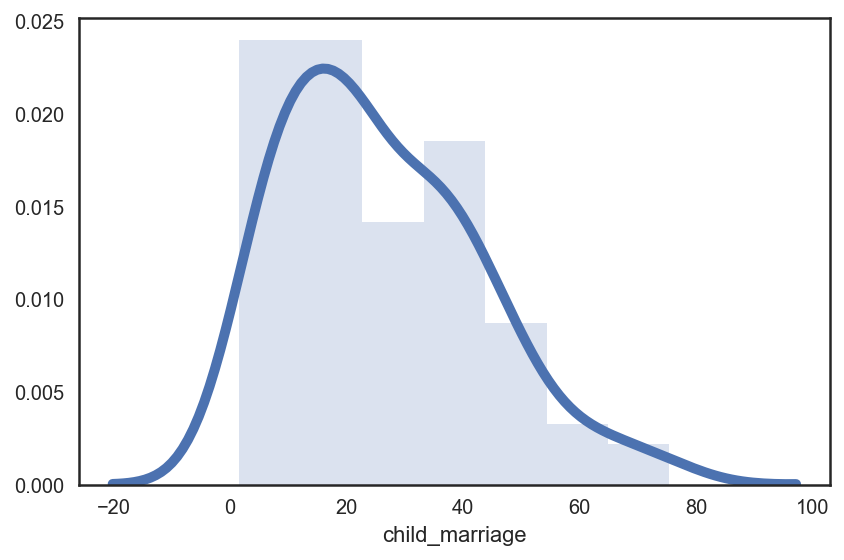

In [36]:
histogram_plot('Child Marriage', gender.child_marriage)
##some coutries have up to 75% of girls married by 18

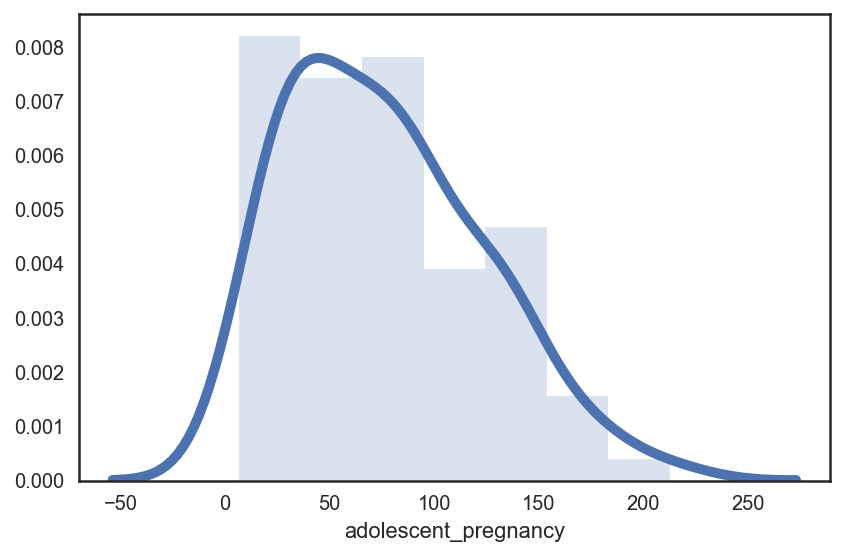

In [37]:
histogram_plot('Child Pregnancy', gender.adolescent_pregnancy)
##births per 1000 women age 15-19
##The average is around 50 per every 1000 undoubtedly some are from early marriage.

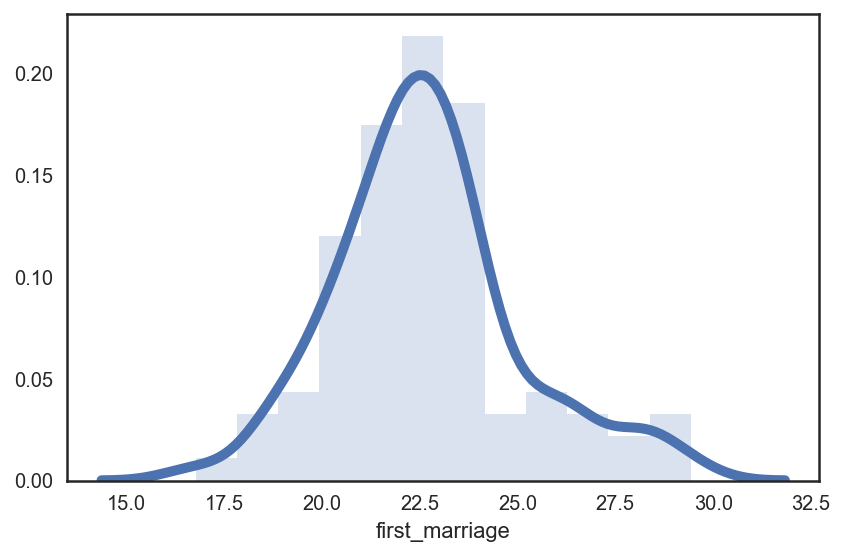

In [38]:
histogram_plot('First Marriage Age', gender.first_marriage)
##average age of first marriage is around 22 worldwide. This seems really low for countries like the US and the Nordic countries

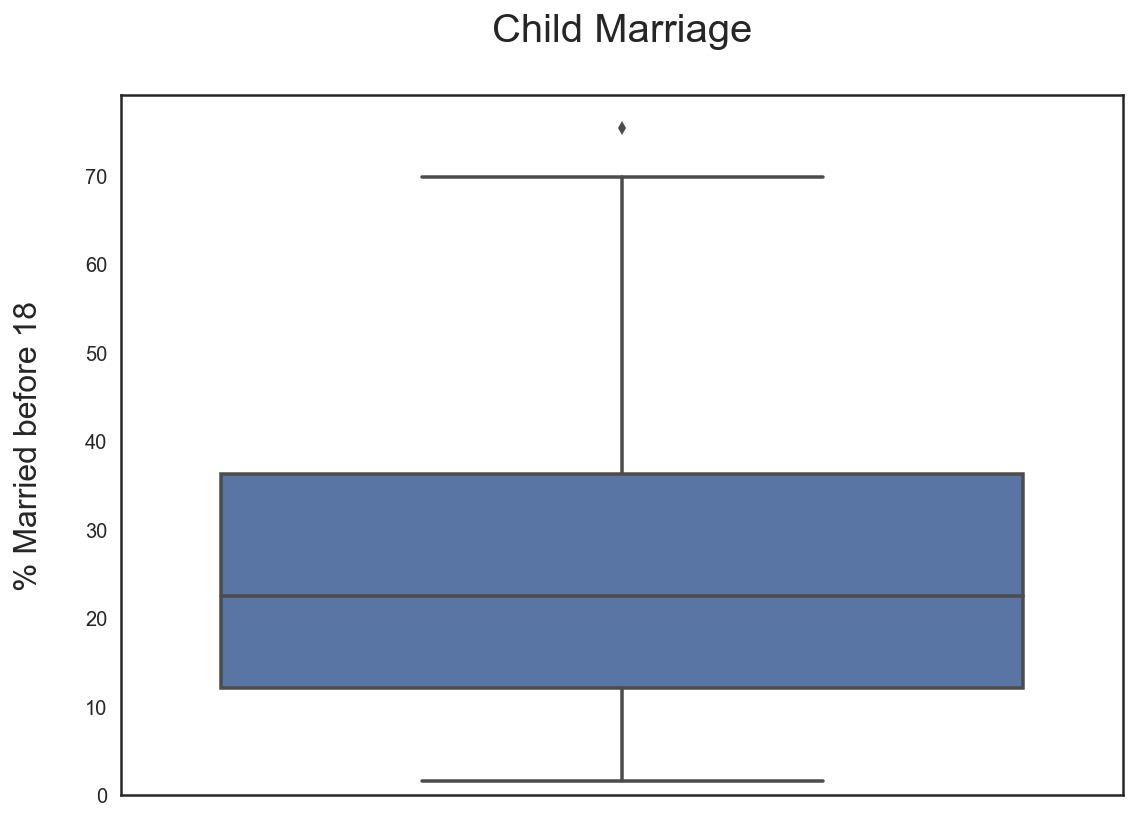

In [39]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.boxplot(gender1.child_marriage, orient='v', ax=ax)

ax.set_ylabel('% Married before 18\n', fontsize=16)
ax.set_title('Child Marriage\n', fontsize=20)
ax.set_ylim(0,)
plt.show()
##Most lie between 10-35% with a large upper bound
##There is quite a bit of variability here, which means that it may be difficult to assess accurate predictions.

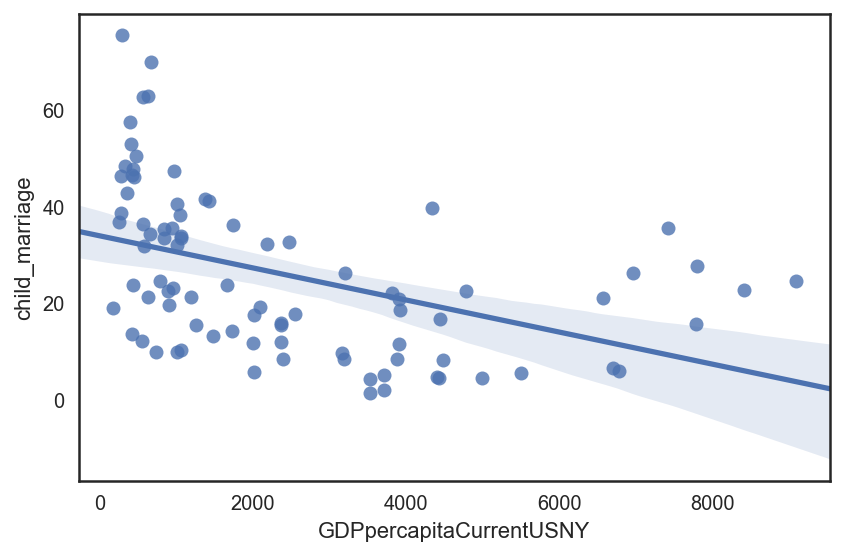

In [40]:
ax=sns.regplot(x='GDPpercapitaCurrentUSNY', y='child_marriage', data=gender)
##negative correlation between GDP and child marriage. This makes intuitive sense.

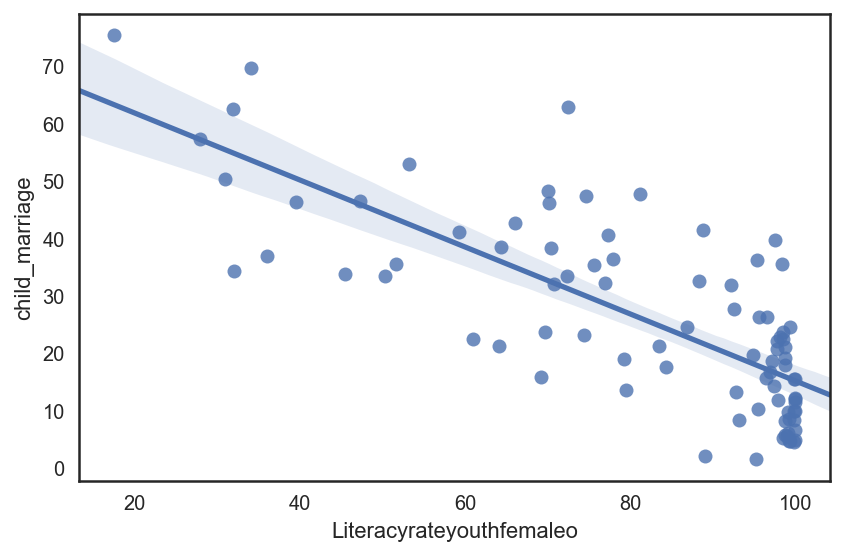

In [41]:
ax=sns.regplot(x='Literacyrateyouthfemaleo', y='child_marriage', data=gender)

##strong and clear negative correlation between youth female literacy and child marriage. More on this later.

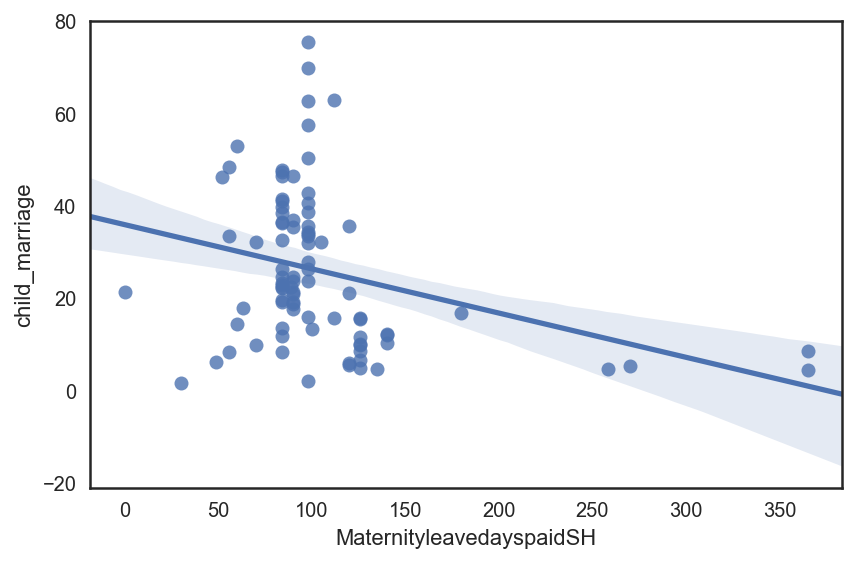

In [42]:
ax=sns.regplot(x='MaternityleavedayspaidSH', y='child_marriage', data=gender)

##More paid days of maternity leave correlates with lower child marriage. This is likely not a strong predictor, but just an interesting correlation because of recent news. 

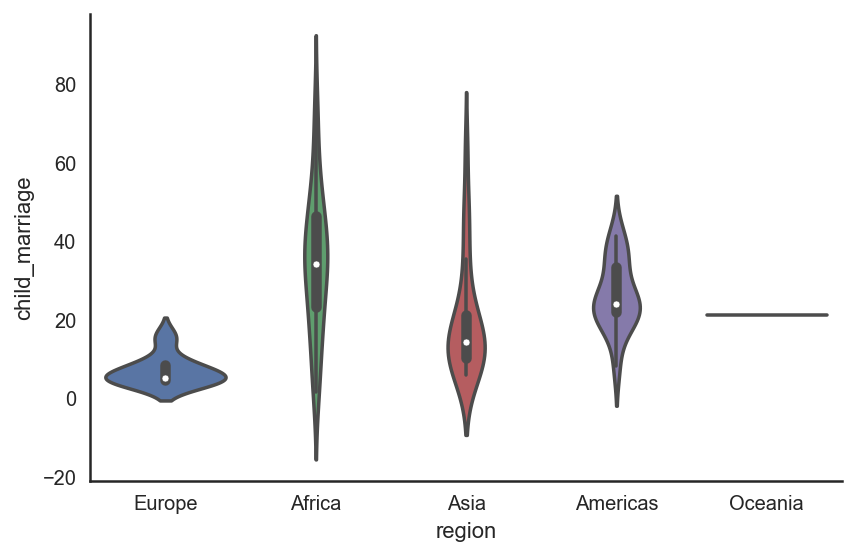

In [43]:
##code from https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/
import seaborn as sns 
sns.violinplot(gender['region'], gender['child_marriage']) #Variable Plot
sns.despine()
##Africa has the largest variability in Child Marriage percentages. This is due to a wide range of development levels within the continent. Not surprisingly, Europe has the smalles variability and lowest overall percentage.

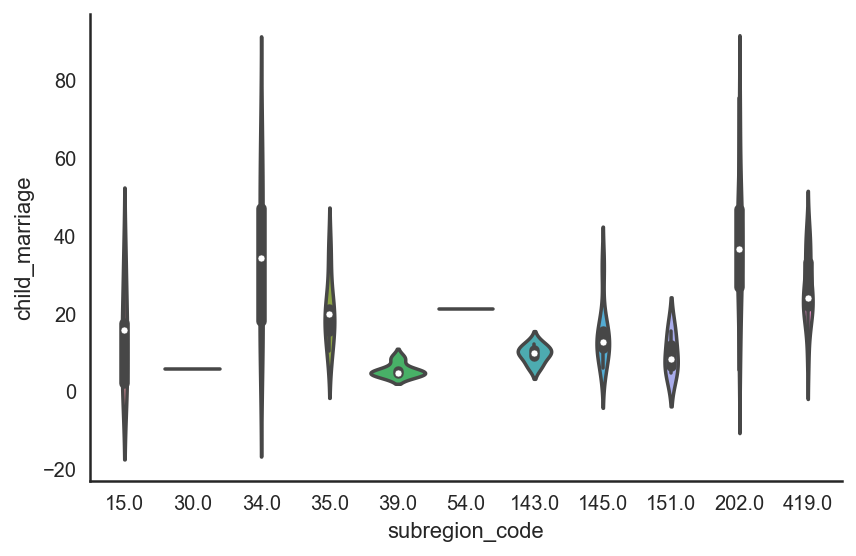

In [44]:
import seaborn as sns 
sns.violinplot(gender['subregion_code'], gender['child_marriage'], figsize=(18,10)) #Variable Plot
sns.despine()
##The graph was too difficult to visualize with subregion names. Refer to groupby below for reference. 
##You can see that Eastern Asia has no variability. This is likely because it includes very few countries all of which have more similar cultures than other regions. 
##Southern Asia and Subsaharan Africa have large variability and also contain the countries with the highest child marriage rates. 

In [45]:
subregion_andcode=gender.groupby(['subregion'])[['subregion_code']].mean().reset_index()
subregion_andcode.sort('subregion_code', ascending=0)

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,subregion,subregion_code
3,Latin America and the Caribbean,419.0
9,Sub-Saharan Africa,202.0
2,Eastern Europe,151.0
10,Western Asia,145.0
0,Central Asia,143.0
4,Melanesia,54.0
8,Southern Europe,39.0
6,South-eastern Asia,35.0
7,Southern Asia,34.0
1,Eastern Asia,30.0


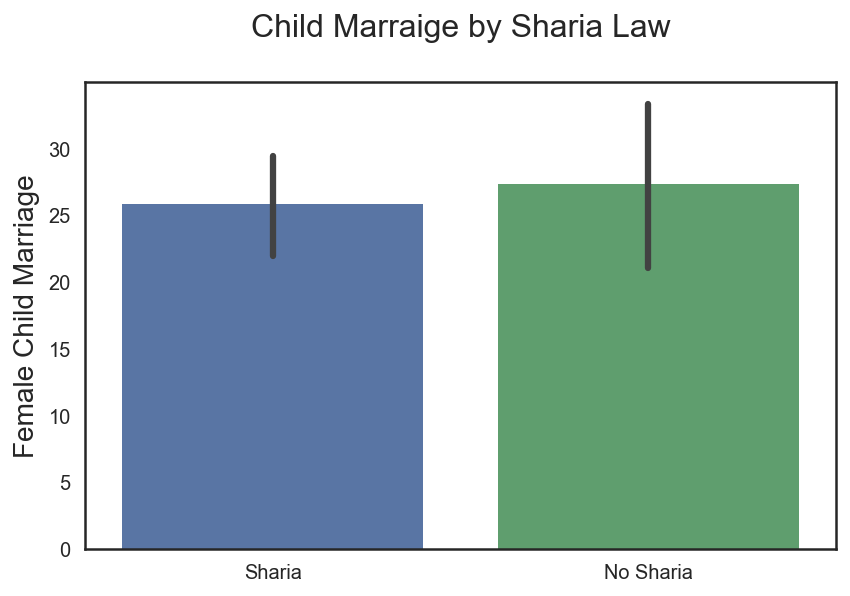

In [46]:
sns.barplot (x='shariah', y='child_marriage', data=gender)


plt.xlabel("", fontsize=14)
plt.xticks([0,1],['Sharia','No Sharia'])
plt.ylabel("Female Child Marriage", fontsize=14)
plt.title('Child Marraige by Sharia Law\n', fontsize=16)
plt.show()

##no significant difference between countries with and without sharia law 

In [47]:
gender.columns.tolist


<bound method Index.tolist of Index([                        u'CountryName',
                                      u'code',
                      u'adolescent_pregnancy',
                            u'first_marriage',
                 u'Agedependencyratioofworki',
                  u'Birthratecrudeper1000peo',
                u'Causeofdeathbycommunicable',
          u'deathby_communicable_disease_old',
                            u'death_byinjury',
                        u'death_byinjury_old',
                u'Causeofdeathbynoncommunica',
       u'deathby_noncommunicable_disease_old',
              u'Contraceptiveprevalenceanyme',
             u'Contraceptiveprevalencemodern',
                u'Costofstartupproceduresfem',
                  u'Deathratecrudeper1000peo',
                u'Femalemigrantsofinternatio',
                u'Fertilityratetotalbirthspe',
                    u'GDPgrowthannualNYGDPMK',
                   u'GDPpercapitaCurrentUSNY',
               u'Healthexpendi

In [48]:
##removing columns with words
##Regression models only work with numeric data
gender2=gender[['adolescent_pregnancy','first_marriage','Agedependencyratioofworki','Birthratecrudeper1000peo',
                 'Causeofdeathbycommunicable','deathby_communicable_disease_old','death_byinjury','death_byinjury_old','Causeofdeathbynoncommunica','deathby_noncommunicable_disease_old',
                 'Contraceptiveprevalenceanyme','Contraceptiveprevalencemodern','Costofstartupproceduresfem','Deathratecrudeper1000peo',
                 'Femalemigrantsofinternatio','Fertilityratetotalbirthspe','GDPgrowthannualNYGDPMK','GDPpercapitaCurrentUSNY',
                 'HealthexpenditurepercapitaP','ImmunizationDPTofchildren','Immunizationmeaslesofchil','Improvedsanitationfacilities',
                 'Laborforceparticipationratef','CI','Lawmandatesequalremuneration','Lawmandatespaidorunpaidmate',
                 'Lawmandatesnondiscriminationb','Legislationexistsondomesticv','Legislationspecificallyaddress','Lifeexpectancyatage60femal',
                 'Lifeexpectancyatbirthfemale','Literacyrateadultfemaleo','Literacyrateyouthfemaleo','Marriedwomenarerequiredbyla',
                 'Maternalmortalityratiomodele','MaternityleavedayspaidSH','Mortalityrateinfantper100',
                 'Mortalityrateunder5per10','Mothersareguaranteedanequiva','Nonpregnantandnonnursingwomen','NumberofmaternaldeathsSHMM',
                 'Peoplepracticingopendefecatio','Populationages014oftotal','Populationages1564oftota','Populationages65andabove',
                 'Populationfemaleoftotal','Pregnantwomenreceivingprenata','Prevalenceofanemiaamongwomen','Prevalenceofobesityfemale',
                 'Proportionofseatsheldbywome','Proportionofwomeninministeri','Ratiooffemaletomalelaborfo','female_male_unemployment',
                 'Ruralpopulationfemaleoft','Schoolenrollmentprimarygros','Sexratioatbirthmalebirths','Startupprocedurestoregister',
                 'Urbanpopulationfemaleoft','womans_testimony','child_marriage','region_code','subregion_code', 'LDC']]

# Begin Regression Analysis 

In [49]:
##code from logistic regression lab
##create X and y
columns_ = gender2.columns.tolist()
exclude_cols =['child_marriage', 'first_marriage', 'adolescent_pregnancy']
##I have run all regressions with the pregnancy and age at first marriage variables included. They are highly collinear 
##both with one another and with the dependent variable, therefore, I exclude them from the final presented models. 
y = gender2['child_marriage'].values

X = gender2[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(87L,) (87, 60)


In [50]:
##Standardize
##this puts all of the features on the same scale to allow for comparison
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn=ss.fit_transform(X)

In [51]:
##Split data into train and test
##Due to small sample size, I ran all models with a 30%, 35%, 40%  test sizes. However, in the end the 30% test size actually 
##provided estimates with the least overfitting errors.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(60L, 60L) (27L, 60L)


(60L,) (27L,)


C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# OLS

In [52]:
##import and definte OLS packages 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
##fit model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
##import r-squared and MSE measures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
##defining a function to make predictions based on the tran data.
##This will allow us to work through all of the regression models without having to create new code for each type.

def r2_mse(ytrain, testy, xtrain, testx, model, best_model):
    ##actual predictions
    predict_y_train=best_model.predict(xtrain)
    predict_y_test=best_model.predict(testx)
    
    ##MSE
    print ('mse' + model + ' train: %.2f, test: %.2f' % (
        mean_squared_error(ytrain, predict_y_train),
        mean_squared_error(testy, predict_y_test)))
    
    ##r-squared
    print ('r_sqared'+ model+' train: %.2f, test: %.2f' % (
        r2_score(ytrain, predict_y_train),
        r2_score(testy, predict_y_test)))

In [55]:
r2_mse(y_train, y_test, X_train, X_test, 'OLS', lr)
##r-squared is perfect...this is a problem
##The OLS perfectly overfits this data. It is a highly inaccurate model for this data.

mseOLS train: 2.89, test: 1375.18
r_sqaredOLS train: 0.99, test: -3.67


# Regression Tree

In [56]:
##I chose to begin with the regression tree in order to get some sense of the most determinant features and where they split.
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
##grid search for best features
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

##Cross Validate
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=10, verbose=1)

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [57]:
##fit
dtr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    3.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [58]:
##define the best estimators
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10}


best score 0.474206983654


In [59]:
#from CART Lab
def important_features(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [60]:
important_features(X, dtr_best)
##Youth literacy rate holds far more importance than other predictors within this model. This make sense because 
##if young girls can read they can plausibly have more of a defense for continuing their education as opposed to getting married.
##Subregions are more predictive than regions. This makes sense because of the huge variations we saw within regions. 
## Only 5 features are significant here. Let's see how correlated they are below.

,feature,importance
30,Literacyrateyouthfemaleo,0.751787
58,subregion_code,0.217641
38,NumberofmaternaldeathsSHMM,0.030572
44,Pregnantwomenreceivingprenata,0.000000
32,Maternalmortalityratiomodele,0.000000
33,MaternityleavedayspaidSH,0.000000
34,Mortalityrateinfantper100,0.000000
35,Mortalityrateunder5per10,0.000000
36,Mothersareguaranteedanequiva,0.000000
37,Nonpregnantandnonnursingwomen,0.000000


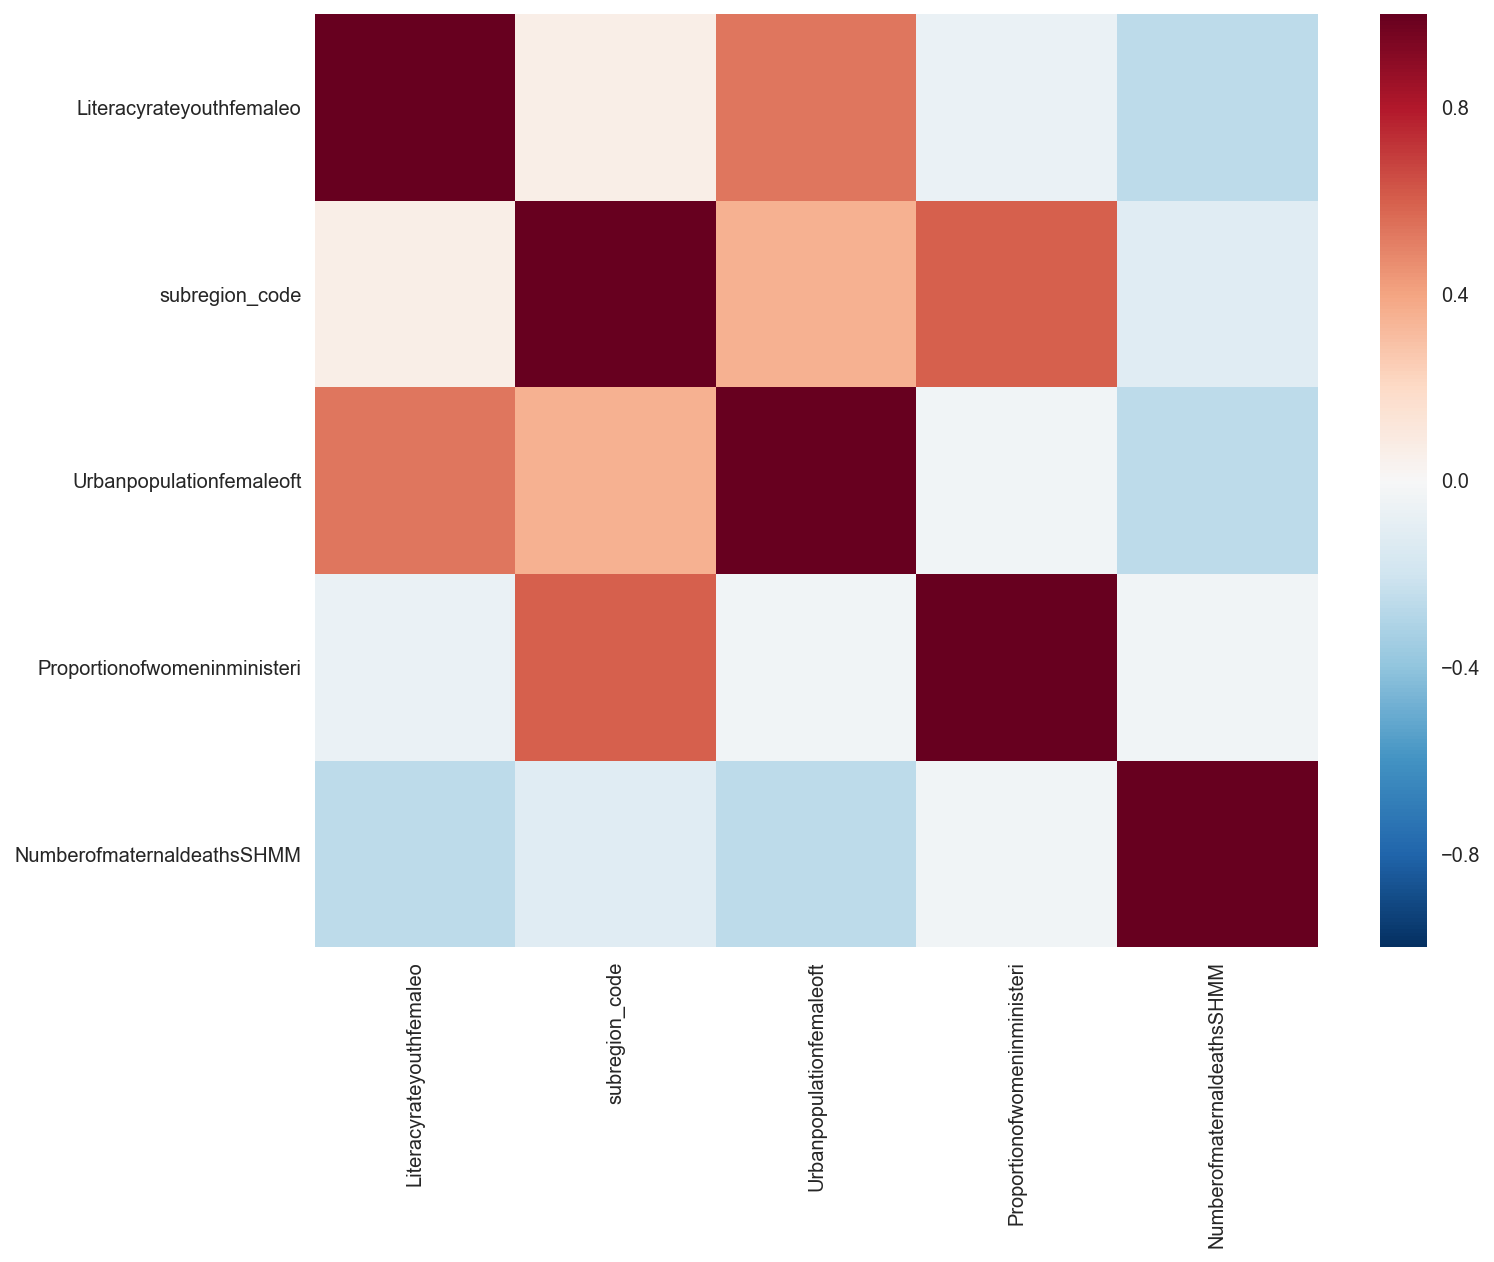

In [61]:
#Code adapted from Mario Carrillo lecture
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(gender2[['Literacyrateyouthfemaleo','subregion_code', 'Urbanpopulationfemaleoft','Proportionofwomeninministeri','NumberofmaternaldeathsSHMM']].corr(), ax=ax)
plt.show()

##Increased urban population and female literacy rate are positively correlated. Urban population can often beseen as an indicator
##for development levels. Keeping this in mind it makes sense that it would also negatively correlate to maternal deaths in labor. 
##subregion correlates to a lot of the features, but it is hard to actually interpret correlation because the code is not based on 
##development factors.

You can see a lot of correlation in our explanatory features. This multicollinearity increases the variance of the model and therefore lowers its predictive power throughout.  

In [62]:
##predict using the decision tree
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([  7.39345238,   7.39345238,   7.39345238,  26.12010417,
        41.64911028,  41.64911028,  41.64911028,  41.64911028,
        41.64911028,  41.64911028,  26.12010417,  41.64911028,
         7.39345238,  26.12010417,  26.12010417,  41.64911028,
        26.12010417,  41.64911028,  26.12010417,  26.12010417,
        41.64911028,  26.12010417,   7.39345238,  41.64911028,
        26.12010417,  41.64911028,  41.64911028])

In [63]:
##r-squared and mse to test the model's fit

r2_mse(y_train, y_test, X_train, X_test, 'Decision_Tree', dtr_best)

mseDecision_Tree train: 82.04, test: 165.06
r_sqaredDecision_Tree train: 0.69, test: 0.44


In [64]:
##possible overfitting as seen in the disparity of r-squared. 
##Extremely high MSE

# Regularization

In [65]:
##import regularization methods
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

# Ridge

In [66]:
##Specify alpha which is set to minimize the penalized SSR
ridge_a= np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_a, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

46.4158883361


In [67]:
##implement and fit

ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=46.4158883361278, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
##Evaluate using MSE and r-squared
r2_mse(y_train, y_test, X_train, X_test, 'Ridge_Regression', ridge)
##still seems to be overfitting the train data, but provides a better model than the regression tree. 

mseRidge_Regression train: 55.37, test: 108.26
r_sqaredRidge_Regression train: 0.79, test: 0.63


In [69]:
##Code from Mega Lab by Mario Carillo

def top_features(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)

    return method_coefs.head(15)

In [70]:
top_features(X, ridge)
##Here the first features are the same, however, we see the addition of other interesting predictive features. 
##Some health indicators such as prenatal care prevelance and obesity rates are negatively related to child marriage.
##This makes sense because usually the more developed countries have higher obesity and more prenatal care availability.
##We also see here that adult female literacy rates enter the picture futher showing the importance of education.

,abs_coef,coef,variable
58,2.351424,2.351424,subregion_code
30,2.146257,-2.146257,Literacyrateyouthfemaleo
44,1.704545,-1.704545,Pregnantwomenreceivingprenata
12,1.704143,-1.704143,Femalemigrantsofinternatio
29,1.661100,-1.661100,Literacyrateadultfemaleo
46,1.311126,-1.311126,Prevalenceofobesityfemale
38,1.215336,1.215336,NumberofmaternaldeathsSHMM
9,0.975386,0.975386,Contraceptiveprevalencemodern
47,0.894937,-0.894937,Proportionofseatsheldbywome
17,0.846647,-0.846647,ImmunizationDPTofchildren


# Lasso

In [71]:
##optimal alpha
##Note: Lasso will drop features without any predictive power. 
optimal_lasso = LassoCV(cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

..........................................................................C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.549154864467


..............[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished


In [72]:
##Run regression and fit to test data

lasso= Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=0.54915486446707351, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
##Evaluate Lasso using definition
r2_mse(y_train, y_test, X_train, X_test, 'Lasso_Regression', lasso)
##Still overfitting. Actually, this is worse overfitting than the ridge model as seen by the disparity between the train and test.

mseLasso_Regression train: 40.94, test: 134.70
r_sqaredLasso_Regression train: 0.84, test: 0.54


Top Features for Lasso

In [74]:
top_features(X, lasso)
##The top predictors here are similar to those in the ridge model. A new interesting feature here suggests that an increase in
##female international migrants will predict decreased percentages of female child marriage. 
#Notice there are fewer features here due to lasso dropping ones with predictive power that approaches 0.

,abs_coef,coef,variable
30,8.436369,-8.436369,Literacyrateyouthfemaleo
58,6.138026,6.138026,subregion_code
12,3.112513,-3.112513,Femalemigrantsofinternatio
38,2.529240,2.529240,NumberofmaternaldeathsSHMM
44,2.300600,-2.300600,Pregnantwomenreceivingprenata
46,2.180053,-2.180053,Prevalenceofobesityfemale
47,1.275623,-1.275623,Proportionofseatsheldbywome
50,0.903799,-0.903799,female_male_unemployment
14,0.743380,-0.743380,GDPgrowthannualNYGDPMK
37,0.281073,-0.281073,Nonpregnantandnonnursingwomen



# Elastic Net 

In [75]:
##Optimal Alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios,cv=10, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.549154864467
1.0


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.0min finished


In [76]:
##Create and fit

elastic_net = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.54915486446707351, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [77]:
##evaluate usting the definition 
r2_mse(y_train, y_test, X_train, X_test, 'Elastic_Net', elastic_net)
## exactly the same fit as the Lasso model with a lot of overfitting and a high MSE. 

mseElastic_Net train: 40.94, test: 134.70
r_sqaredElastic_Net train: 0.84, test: 0.54


In [78]:
top_features(X, elastic_net)
##exactly the same as the lasso model 

,abs_coef,coef,variable
30,8.436369,-8.436369,Literacyrateyouthfemaleo
58,6.138026,6.138026,subregion_code
12,3.112513,-3.112513,Femalemigrantsofinternatio
38,2.529240,2.529240,NumberofmaternaldeathsSHMM
44,2.300600,-2.300600,Pregnantwomenreceivingprenata
46,2.180053,-2.180053,Prevalenceofobesityfemale
47,1.275623,-1.275623,Proportionofseatsheldbywome
50,0.903799,-0.903799,female_male_unemployment
14,0.743380,-0.743380,GDPgrowthannualNYGDPMK
37,0.281073,-0.281073,Nonpregnantandnonnursingwomen


# Random Forest 

In [79]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=10,verbose=1)

In [80]:
##Fit Random Forest
estimator_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   38.7s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [81]:
##best estimators
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 3}


best score 0.459405820275


In [82]:
##best estimators
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 3}


best score 0.459405820275


In [83]:
important_features(X, rfr_best)

##these features match the regression tree rather well, but the model seems to vary with specification. It is highly sensitive.
##Notice that literacy rate, though still important, hace cut its predictive power in half from the regression tree. 

,feature,importance
30,Literacyrateyouthfemaleo,0.361914
58,subregion_code,0.076530
39,Peoplepracticingopendefecatio,0.056047
38,NumberofmaternaldeathsSHMM,0.041397
3,deathby_communicable_disease_old,0.039614
29,Literacyrateadultfemaleo,0.039432
19,Improvedsanitationfacilities,0.038070
46,Prevalenceofobesityfemale,0.032169
13,Fertilityratetotalbirthspe,0.024965
7,deathby_noncommunicable_disease_old,0.023670


In [84]:
##predict and fit
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 13.03965281,   8.46540899,  11.47607483,  25.8447769 ,
        32.35330364,  46.82038716,  39.57473768,  41.89807417,
        34.38070914,  45.76843978,  24.28560127,  41.21642766,
        10.57261447,  28.88760748,  27.49157283,  41.98696449,
        28.64862243,  36.68720495,  26.93861494,  21.49927617,
        42.74281103,  23.28884519,   8.92099266,  40.86293857,
        24.36416432,  39.44371091,  41.57944684])

In [85]:
r2_mse(y_train, y_test, X_train, X_test, 'Random_Forest', rfr_best)

mseRandom_Forest train: 28.54, test: 113.26
r_sqaredRandom_Forest train: 0.89, test: 0.62


The r-squared is actually looking more realistic here. The MSE is still clearly bias from overfitting, but the train and test are slightly closer together. Overall, the model is rather volitile based on my analysis with different test sizes causing features to vary significantly in importance. The Ridge model seems to be predicting the best with the random forest close behind. However, all models have extremely high MSE meaning we are likely missing important predictors of child marriage in this specification.  

# Classifier

In [86]:
##Here I use the mean to create a dummy variable for high child marriage and allow for a classification analysis. 
def make_dummy(x):
    if x <25.878454:
        return 0
    else:
        return 1
    
gender2['high_childmarr'] = gender2.child_marriage.map(make_dummy)

C:\Users\miran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [87]:
columns_ = gender2.columns.tolist()
exclude_cols = ['high_childmarr', 'child_marriage', 'adolescent_pregnancy', 'first_marriage']

y = gender2.high_childmarr.values

X = gender2[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape


(87L,) (87, 60)


In [88]:
##Standardize

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn=ss.fit_transform(X)

In [89]:
from sklearn.cross_validation import train_test_split
##Again I have to adjust train and test percentage due to small sample size. However this time the information is more valuable 
##with half of the data in train and half in test. This is obviously not ideal, but necessary. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(43, 60) (43L,)
(44, 60) (44L,)


# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [91]:
estimator.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 2989 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   14.1s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [92]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 

print "\nBest Params on hold out data (train):\n", estimator.best_params_

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_


Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.907 



Evaluate

In [93]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Low_Marriage', 'True_Label_1 High_Marriage'],
                         columns=['Predict_Label_0 Low_Marriage', 'Predict_Label_1 High_Marriage'])

confusion

##We have a lot of problems here. Mainly, a small number of predictions to be made, but also misclassifications. 
##There are 8 false positives and 5 false negatives. 

,Predict_Label_0 Low_Marriage,Predict_Label_1 High_Marriage
True_Label_0 Low_Marriage,17,9
True_Label_1 High_Marriage,7,11


In [94]:
''' Code by Matt Hancock => thus far one of the best explanations of a Confusion Matrix
http://notmatthancock.github.io/2015/10/28/confusion-matrix.html'''

def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

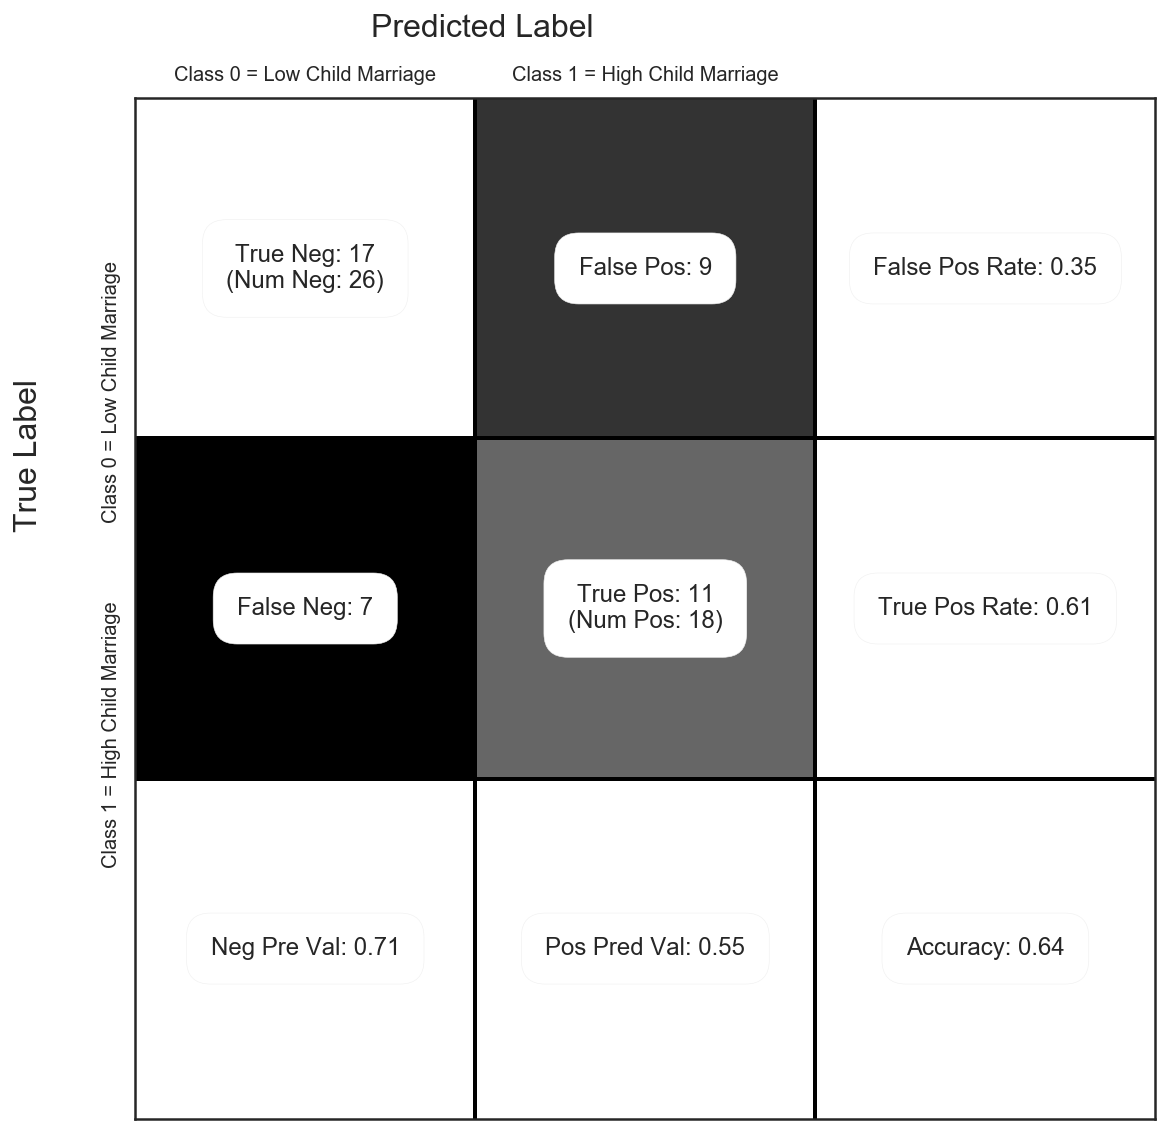

In [95]:
C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Low Child Marriage', 'Class 1 = High Child Marriage'])

##Accuracy here is only at 64%. This means that 36% of the countries put into the logistic model were predicted incorrectly in some way. 
##Should be noted that this binary result may lead to many misclassifications right around the mean where a lot of countries lie. 

ROC Curve (from Logistic_evaluation lab)

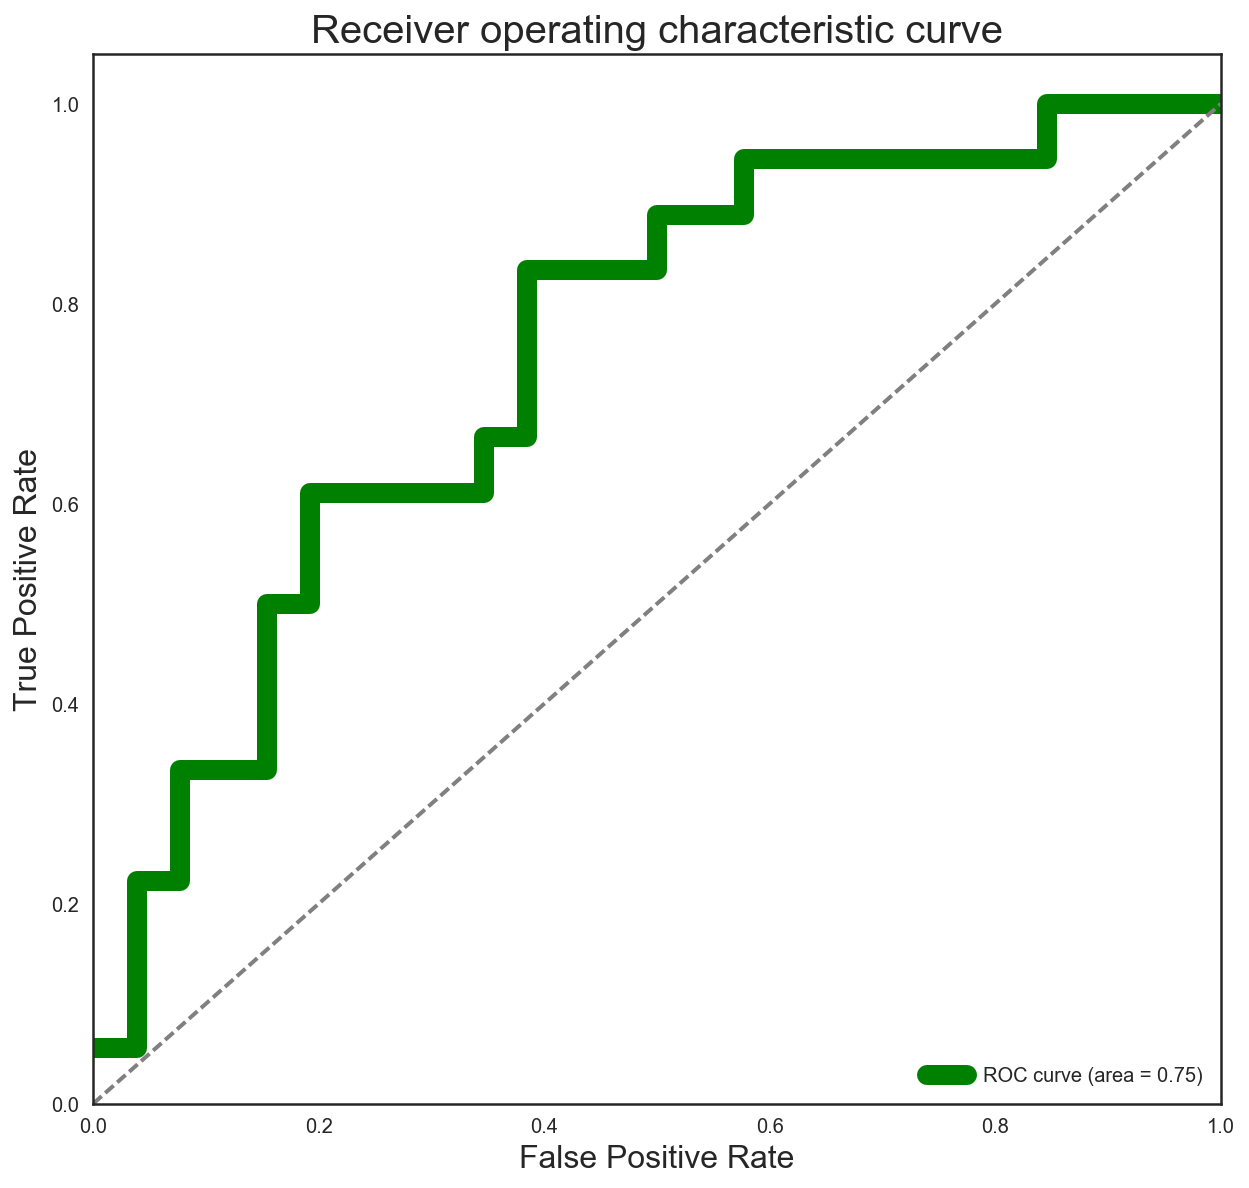

In [96]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# KNN

In [97]:
##set x and y
columns_ = gender2.columns.tolist()
exclude_cols = ['high_childmarr', 'child_marriage', 'adolescent_pregnancy', 'first_marriage']

y = gender2.high_childmarr.values

X = gender2[[i for i in columns_ if i not in exclude_cols]]
X=X.values
print y.shape, X.shape

(87L,) (87L, 60L)


In [98]:
#FRom KNN lab solutions 
## Gridsearch to determine idel number of neighbors to match upon 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance'],
    'p' :[2],
    'metric' : ['minkowski']
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)
knn_gs.fit(X, y)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.8s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'metric': ['minkowski'], 'weights': ['uniform', 'distance'], 'p': [2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [99]:
print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

##8 matching features 

{'n_neighbors': 8, 'metric': 'minkowski', 'weights': 'uniform', 'p': 2}


In [100]:
##cross validation 
from sklearn.cross_validation import StratifiedKFold
cv_indices = StratifiedKFold(y, n_folds=5, shuffle=True)
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    scores = []
    
    for train_i, test_i in cv_indices:
        
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        y_train = y[train_i]
        y_test = y[test_i]
        print 'Xtrain and ytrain shapes:\n', X_train.shape, y_train.shape
        print 'Xtest and ytest shapes:\n', X_test.shape, y_test.shape
        
        knn.fit(X_train, y_train)
        
        acc = knn.score(X_test, y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc) 
        print ('-' * 20 + '\n')
    print('Mean CV accuracy:', np.mean(scores))


In [101]:
accuracy_crossvalidator(X, y, best_knn, cv_indices)

Xtrain and ytrain shapes:
(69L, 60L) (69L,)
Xtest and ytest shapes:
(18L, 60L) (18L,)
('Fold accuracy:', 0.77777777777777779)
--------------------

Xtrain and ytrain shapes:
(69L, 60L) (69L,)
Xtest and ytest shapes:
(18L, 60L) (18L,)
('Fold accuracy:', 0.72222222222222221)
--------------------

Xtrain and ytrain shapes:
(70L, 60L) (70L,)
Xtest and ytest shapes:
(17L, 60L) (17L,)
('Fold accuracy:', 0.76470588235294112)
--------------------

Xtrain and ytrain shapes:
(70L, 60L) (70L,)
Xtest and ytest shapes:
(17L, 60L) (17L,)
('Fold accuracy:', 0.70588235294117652)
--------------------

Xtrain and ytrain shapes:
(70L, 60L) (70L,)
Xtest and ytest shapes:
(17L, 60L) (17L,)
('Fold accuracy:', 0.88235294117647056)
--------------------

('Mean CV accuracy:', 0.77058823529411768)


In [102]:
##About 77% accuracy here which is not much different from the logistic regression

# PCA

In [103]:
from ipywidgets import *
from IPython.display import display

In [104]:
gender4= gender2[[i for i in columns_ if i not in exclude_cols]]
##All of the following code adapted from PCA-Parallel Lecture
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
gender3 = ss.fit_transform(gender4)
gender3


array([[-0.96014574, -1.33121002, -1.33898643, ...,  1.36410019,
        -1.12444611, -0.68889496],
       [-0.90370591, -0.48695185, -0.78860675, ..., -0.85555785,
        -1.30890898, -0.68889496],
       [-1.13815111, -1.27267967, -1.24912976, ...,  1.24411868,
        -0.30973508, -0.68889496],
       ..., 
       [ 1.08575614,  0.76339853,  0.6049235 , ...,  1.24411868,
        -0.30973508,  1.4516001 ],
       [ 1.53059184,  1.38985397,  1.351169  , ..., -0.85555785,
         0.12836425,  1.4516001 ],
       [ 0.68174731,  0.67360911,  1.61421938, ..., -0.85555785,
         0.12836425, -0.68889496]])

In [105]:
## Fit the PCA 
from sklearn.decomposition import PCA
gender_pca = PCA().fit(gender3)
print "Number of PCA components is: \n", gender_pca.n_components_
print "\n======\n"
print "List of PCA components is:\n", gender_pca.components_
##61 components!

Number of PCA components is: 
60


List of PCA components is:
[[  1.86659613e-01   1.89912558e-01   1.81173003e-01 ...,  -1.12699445e-01
   -5.64832399e-03   1.55452986e-01]
 [  3.92052509e-03   2.43000195e-02  -8.59100096e-02 ...,   9.09283894e-02
   -1.58946273e-01  -2.68451896e-02]
 [  1.01408100e-01   9.59058839e-02   9.08999590e-02 ...,  -3.14991562e-01
    3.30786730e-01  -6.58228898e-02]
 ..., 
 [  1.35419594e-03   3.51783937e-05  -4.48478290e-03 ...,   7.83238125e-05
   -1.69618157e-04   1.32618886e-05]
 [ -0.00000000e+00  -7.66742646e-16  -3.29848320e-15 ...,   7.71682888e-16
    8.60074964e-16   1.38758214e-15]
 [  0.00000000e+00   3.03812734e-16  -3.23337814e-15 ...,   5.41918459e-17
    1.96327815e-16  -1.66421419e-17]]


In [106]:
##Dimensionality reduction
gender_pcs = gender_pca.transform(gender3)
gender_pcs

array([[ -5.69315427e+00,   2.69572906e-01,  -3.32417639e+00, ...,
          7.80325325e-05,   1.44328993e-15,  -1.97758476e-16],
       [ -3.86628349e+00,   3.00400642e+00,   1.58342297e+00, ...,
          1.81525509e-04,  -6.10622664e-16,  -3.78169718e-16],
       [ -5.53796171e+00,  -3.65915923e-01,  -2.76582415e+00, ...,
         -4.90366671e-05,  -9.99200722e-16,   1.17961196e-16],
       ..., 
       [  3.50872960e+00,   6.65976456e+00,   1.26519983e+00, ...,
          1.09648860e-04,  -1.44328993e-15,  -2.49800181e-16],
       [  4.90633012e+00,  -2.56014304e+00,   6.88169644e-01, ...,
          5.32678036e-05,   3.33066907e-16,   1.24900090e-16],
       [  4.22152373e+00,  -3.34704852e+00,   1.55970529e+00, ...,
          7.40184497e-06,   1.16573418e-15,  -1.87350135e-16]])

In [107]:
##add binary dependent variable back in 

gender_pcs = pd.DataFrame(gender_pcs, columns=['PC'+str(i) for i in range(1, gender_pcs.shape[1]+1)])
gender_pcs['high_childmarr'] = gender2.high_childmarr

In [108]:
gender_pcs.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,high_childmarr
0,-5.693154,0.269573,-3.324176,-0.769019,0.356975,-0.623949,0.584340,1.444776,-1.065300,-0.282433,...,0.002894,0.004900,0.027886,-0.024884,-0.002010,-0.006823,0.000078,1.443290e-15,-1.977585e-16,0
1,-3.866283,3.004006,1.583423,0.053054,2.070526,-0.084130,-1.312056,0.680826,0.068511,0.031786,...,0.077557,0.048234,-0.019995,-0.034371,-0.009905,-0.001121,0.000182,-6.106227e-16,-3.781697e-16,0
2,-5.537962,-0.365916,-2.765824,-1.576487,-0.139881,-0.229487,-1.679977,-2.035312,-1.727089,2.270638,...,-0.012652,-0.052566,0.025008,0.029664,-0.013018,-0.001146,-0.000049,-9.992007e-16,1.179612e-16,0


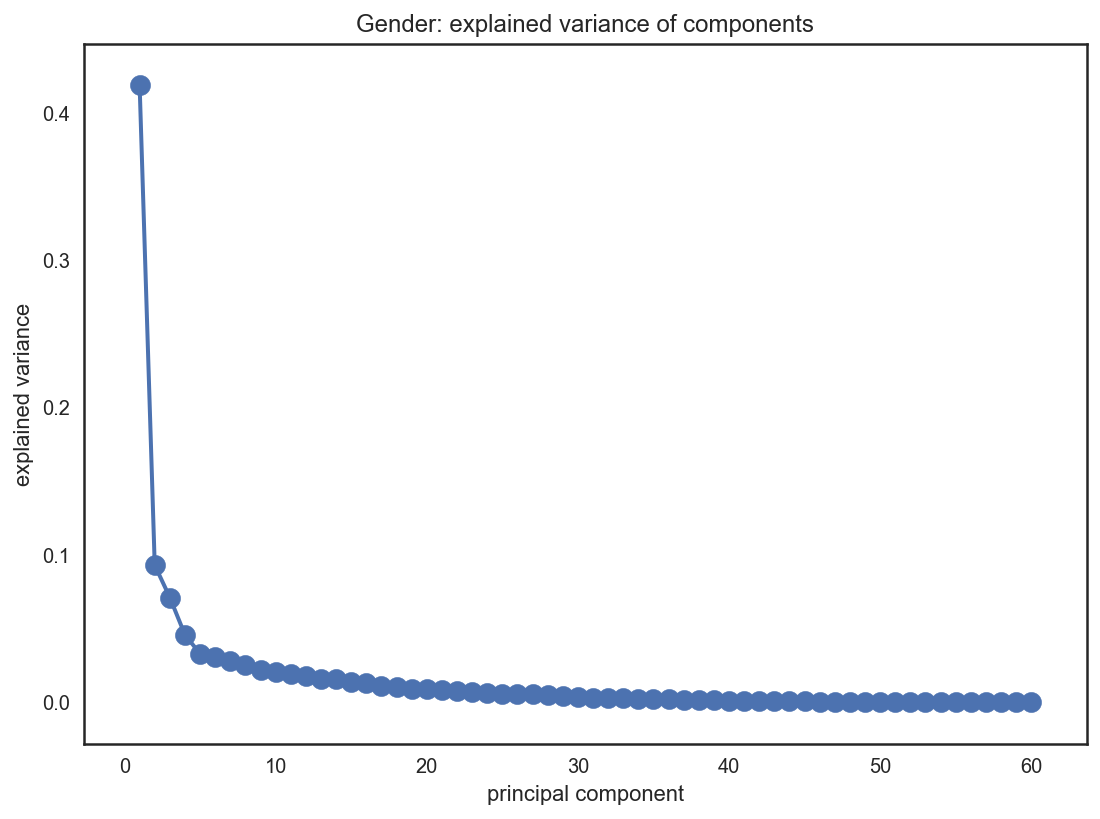

In [109]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, gender3.shape[1]+1), gender_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, gender3.shape[1]+1), gender_pca.explained_variance_ratio_, s=100)
ax.set_title('Gender: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

I should be using way fewer than the 60 principal components that I have here! Let's look at which ones are most important.


# Horn analysis-Determine the correct number of principal components

In [110]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [111]:
gender_pa = horn_parallel_analysis(gender4.shape, percentile=95)
gender_pa

array([ 3.43866943,  3.11324094,  2.90517735,  2.74089093,  2.59582255,
        2.46952173,  2.35421649,  2.24609422,  2.14711981,  2.04912101,
        1.9633328 ,  1.87691736,  1.79971561,  1.72103409,  1.64058697,
        1.57632358,  1.50366392,  1.4410064 ,  1.37685902,  1.3202758 ,
        1.26180696,  1.20452813,  1.14768216,  1.09795022,  1.04498599,
        0.99839307,  0.95023982,  0.90616147,  0.86188598,  0.81872769,
        0.77780563,  0.73527772,  0.70182863,  0.66195455,  0.62442438,
        0.58858591,  0.55554127,  0.52173906,  0.49158734,  0.46060812,
        0.43177727,  0.40316511,  0.37722073,  0.3469319 ,  0.32383114,
        0.29753077,  0.2747856 ,  0.25215265,  0.23102669,  0.21077009,
        0.1918087 ,  0.17188817,  0.15323866,  0.13532057,  0.11888679,
        0.10317915,  0.08786355,  0.07350314,  0.05977586,  0.04529728])

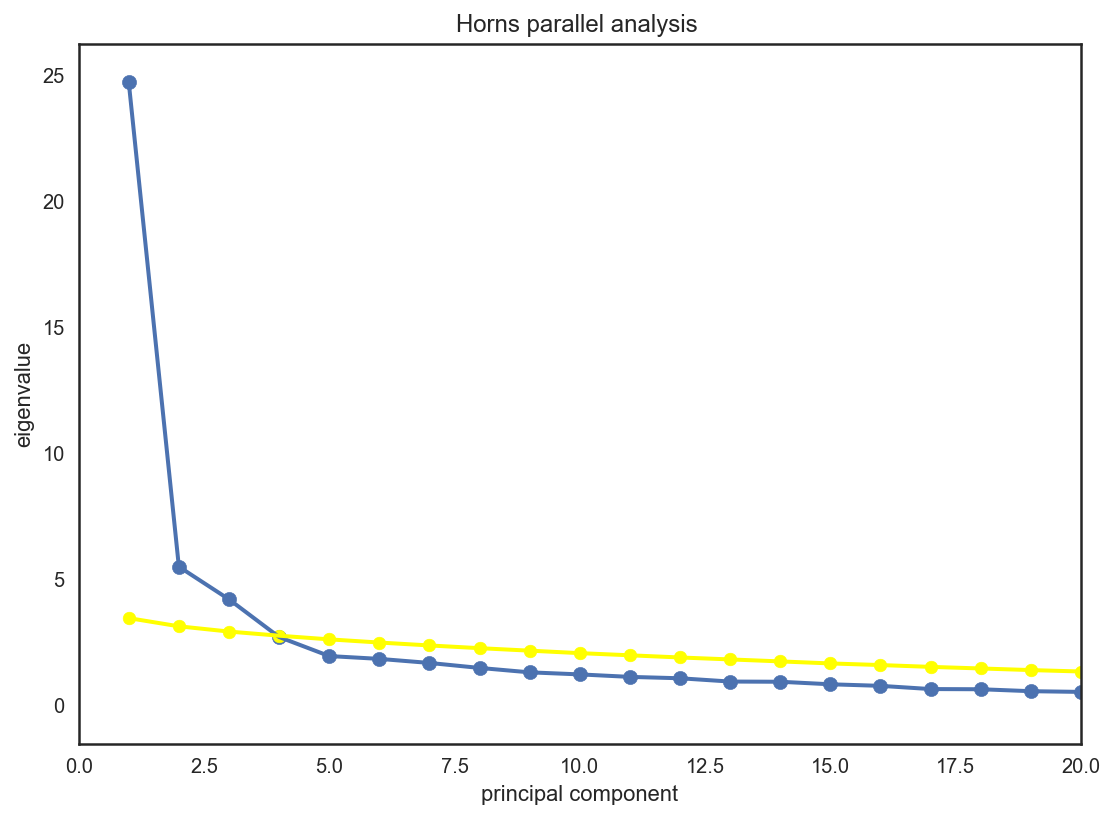

In [112]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, gender4.shape[1]+1), gender_pca.explained_variance_, lw=2)
ax.scatter(range(1, gender4.shape[1]+1), gender_pca.explained_variance_, s=50)

ax.plot(range(1, len(gender_pa)+1), gender_pa, lw=2, color='yellow')
ax.scatter(range(1, len(gender_pa)+1), gender_pa, s=40, color='yellow')


ax.set_title('Horns parallel analysis ')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
ax.set_xlim(0,20)
plt.show()

##4 is the correct number of components

In [113]:
for col, comp in zip(gender4.columns, gender_pca.components_[4]):
    print col, comp
    ##very different components from other models

Agedependencyratioofworki 0.0699355261702
Birthratecrudeper1000peo 0.053406761626
Causeofdeathbycommunicable -0.0574085746279
deathby_communicable_disease_old -0.0405426612038
death_byinjury 0.0699119558135
death_byinjury_old 0.0336365602713
Causeofdeathbynoncommunica 0.039063913249
deathby_noncommunicable_disease_old 0.0389263367146
Contraceptiveprevalenceanyme 0.0161544763489
Contraceptiveprevalencemodern -0.0365715560414
Costofstartupproceduresfem 0.0249570687954
Deathratecrudeper1000peo -0.0957820915783
Femalemigrantsofinternatio 0.14075851848
Fertilityratetotalbirthspe 0.0548672285596
GDPgrowthannualNYGDPMK -0.0718586199839
GDPpercapitaCurrentUSNY -0.0919479702162
HealthexpenditurepercapitaP -0.0616458010738
ImmunizationDPTofchildren 0.0403665238832
Immunizationmeaslesofchil 0.0612491332928
Improvedsanitationfacilities 0.000667902236289
Laborforceparticipationratef 0.0135554273796
CI -0.0600549829966
Lawmandatesequalremuneration 0.447028374399
Lawmandatespaidorunpaidmate -0.0
Lawm

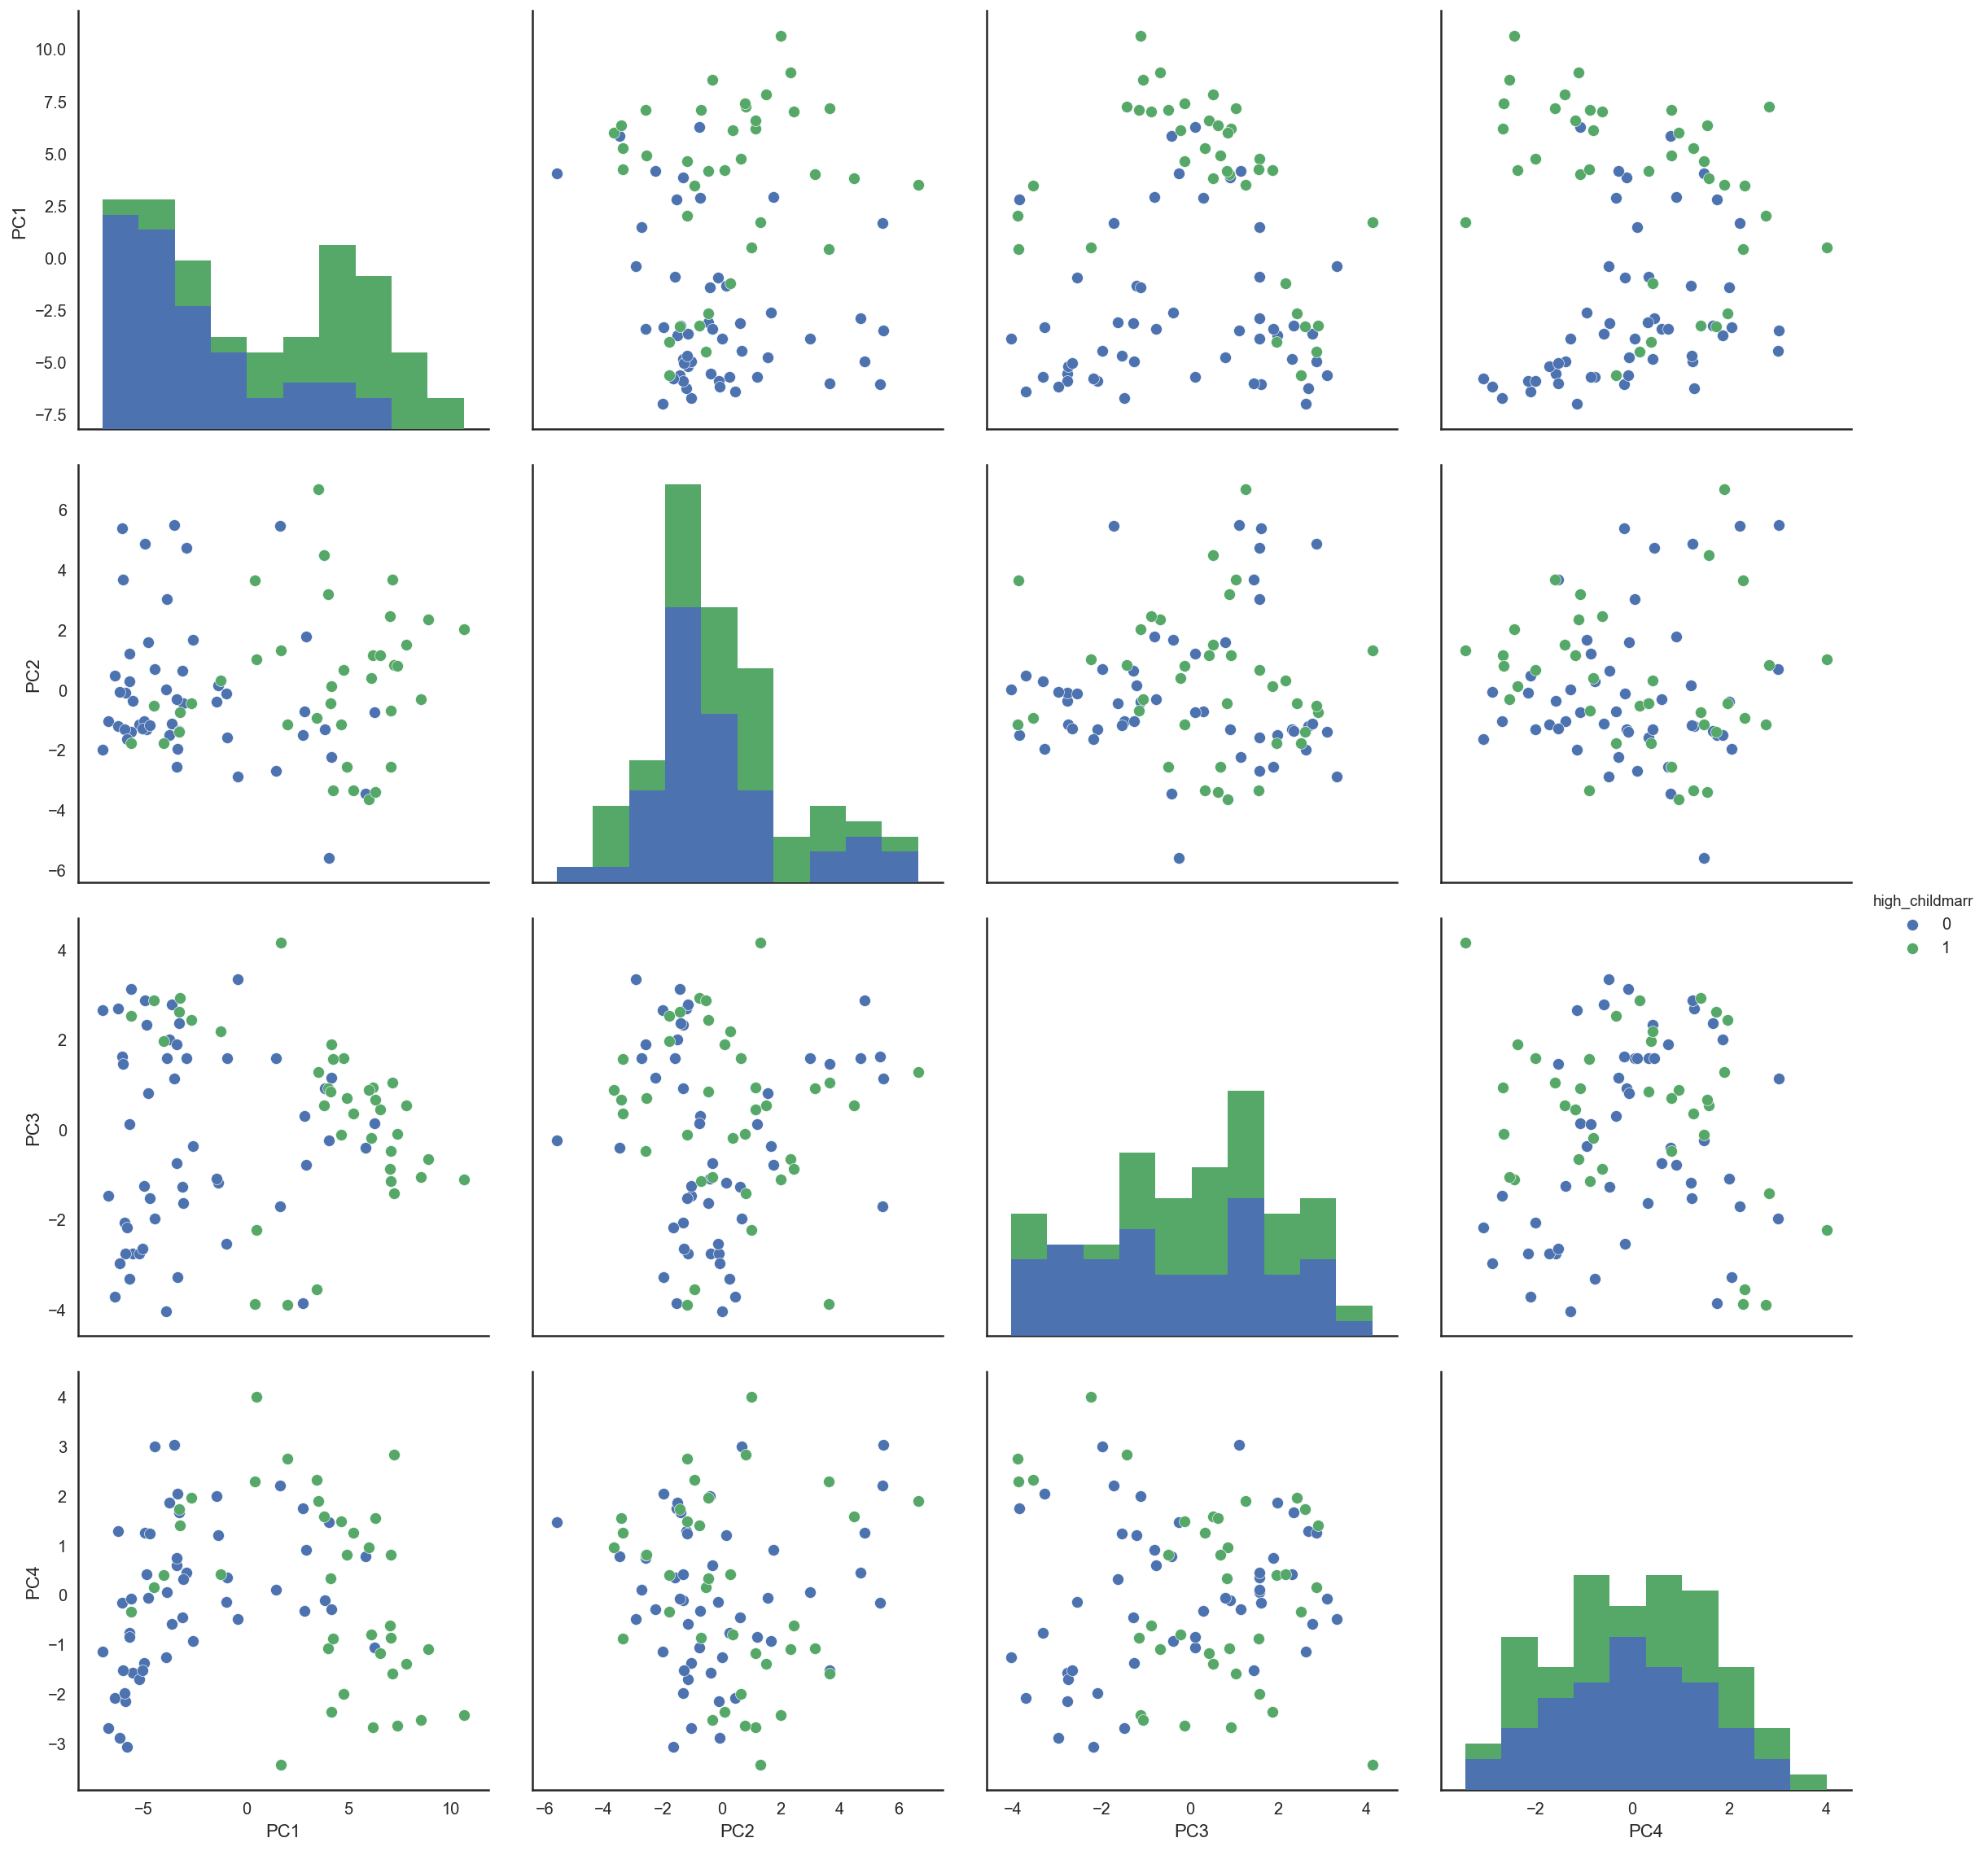

In [114]:
sns.pairplot(data=gender_pcs, vars=['PC1','PC2','PC3','PC4'], hue='high_childmarr', size=4)
plt.show()

The principal components are not doing well distinguishing between high and low child marriage rates. You can tell by the fact that there is no clear distinction between green and blue dots in the scatter. I choose to stop here as I have noticed that the binary dependent variable is not a good way to analyze my data.

# Technical Conclusion

In this analysis, we have looked beyond the traditional socioeconomic indicators in an attempt to create a predictive model for child marriage internationally. I chose to use an average of the years 2000-2015 for a few reasons. First, before this time period, laws did not take child marriage into account and it is not correct to combine this with previous time periods. Also, I did this in an attempt to reduce missing data. That being said, the power in this model as a whole is drastically reduced by the fact that many countries at the top and bottom of the child marriage spectrum are eliminated due to them not reporting. Additionally, many features that could have help some importance had to be dropped due to lack of data in certain countries that I wanted to retain in the study. Keeping this in mind,the analysis proceeds to search for predictors. 

From the EDA analysis, we see that the average female child marriage rate is around 26%, but that this number varies widely with the lowest countries reporting around 1% and the highest (Niger) reporting over 75% of their females are married before age 18. Regions show high variability which explains why it does not seem to hold predictive power in the models unlike subregion. Also, negative correlations are found between child marrige and both GDP per capita and female youth literacy rate. 

Moving into the regression analysis, we find significant overfitting in all models most likely attributable to the small number of observations. Models also report extremely high MSEs. A lot of the high errors stem from collinearity within the explanatory features. Ridge proved the most successful regression model with the the smallest disparities between train and test and remaining realisitc. The random forest provides the second best estimates. Though the models are extremely volitile between test sample sizes, they are relatively consistent with top predictors across models with Female Youth Literacy Rates remaining significantly more important than other predictors. 

Next, the analysis moves to classification methods. In order to do this, the child marriage variable is split into a binary variable based at the mean with those above classified as 1 and those bellow classified as 0. Doing this arguably creates a lot of bias for those countries with rates near the mean. And, in fact, there is a sinificant amount of misclassification throughout logisitc, KNN, and PCA models because of this and the small sample size. I would however choose logistic over the other two forms of classification as the ROC shows an 80% correct classification rate. 
    
Overall, this model could be improved with more complete data. Additionally, the use of a larger panel type data set could prove beneficial. With more time and understanding, I would use KNN to fill in missing variables from the larger panel dataset that the UN has available. 

# Non-Technical Conclusions

This analysis uses data from 86 countries from 2000-2015 to determine the predictors of female child marriage worldwide. More specifically, this analysis uses gender indicators as set out by the UN's World Development Indicators. Using these allows us to analyze how we can change things specifically for females to lessen their chances of being forced into child marriage. 

In an initial exploration of the data, we find that Africa and Asia are the regions with the highest instances of child marriage. More specifically, the subregions of Subsaharan Africa and Southern Asia drive these high rates. Niger, the world's poorest country, also has the study's highest instance with an average above 75% over the 15 year period. Unsurprisingly, European countries have the lowest rates of female child marriage in the study (Note: North American countries were dropped due to lack of data).

Though the regression results presented should be taken likely due to low data availability, we find the top predictor in all models to be female youth literacy rate by a large margin. Intuitively, this makes a lot of sense. If a girl is getting educated to the point of literacy, she is likely to insert herself into the marriage decision because she has greater opportunity and can prove her worth beyond child rearing. Subregion also seems to hold predictive power, which means that culture matters in determining a country's rate of female child marriage. Other indicators with possible importance include the number of women receiving prenatal care, the number of female international migrants, and female obesity rates. 

# Bonus: Mapping attempt

In [115]:
longitude=pd.read_csv('C:\Users\miran\Desktop/ECON628-01-milambert/longitude.csv')
##add countries' average location from https://opendata.socrata.com/dataset/Country-List-ISO-3166-Codes-Latitude-Longitude/mnkm-8ram

In [116]:
gender3=gender.merge(longitude, on=['code'], how='left')

In [117]:
gender3.head()
##longitude and latitude are added 

,CountryName,code,adolescent_pregnancy,first_marriage,Agedependencyratioofworki,Birthratecrudeper1000peo,Causeofdeathbycommunicable,deathby_communicable_disease_old,death_byinjury,death_byinjury_old,...,region_code,region,subregion_code,subregion,Country or Area_y,M49 Code,LDC,Latitude (average),Longitude (average),Icon
0,Albania,ALB,19.617293,24.133333,51.512443,13.072333,11.524527,4.554116,38.249139,9.735979,...,150.0,Europe,39.0,Southern Europe,Albania,8,0,41.0,20.0,NaN
1,Algeria,DZA,10.409600,29.433333,52.558330,22.260600,25.407063,14.405381,24.006821,8.002170,...,2.0,Africa,15.0,Northern Africa,Algeria,12,0,28.0,3.0,NaN
2,Armenia,ARM,29.573973,23.460000,48.213821,13.709333,13.791032,2.446705,18.017123,3.962334,...,142.0,Asia,145.0,Western Asia,Armenia,51,0,40.0,45.0,NaN
3,Azerbaijan,AZE,46.150347,24.116667,45.783306,16.686667,18.555441,5.258741,16.805794,4.377509,...,142.0,Asia,145.0,Western Asia,Azerbaijan,31,0,40.5,47.5,NaN
4,Bangladesh,BGD,95.475827,18.900000,61.362475,23.225200,43.534087,23.915266,26.396085,8.540435,...,142.0,Asia,34.0,Southern Asia,Bangladesh,50,1,24.0,90.0,NaN


In [118]:
import shapely
import geopandas as gpd
import mplleaflet

In [119]:
gender3.columns.tolist

<bound method Index.tolist of Index([                        u'CountryName',
                                      u'code',
                      u'adolescent_pregnancy',
                            u'first_marriage',
                 u'Agedependencyratioofworki',
                  u'Birthratecrudeper1000peo',
                u'Causeofdeathbycommunicable',
          u'deathby_communicable_disease_old',
                            u'death_byinjury',
                        u'death_byinjury_old',
                u'Causeofdeathbynoncommunica',
       u'deathby_noncommunicable_disease_old',
              u'Contraceptiveprevalenceanyme',
             u'Contraceptiveprevalencemodern',
                u'Costofstartupproceduresfem',
                  u'Deathratecrudeper1000peo',
                u'Femalemigrantsofinternatio',
                u'Fertilityratetotalbirthspe',
                    u'GDPgrowthannualNYGDPMK',
                   u'GDPpercapitaCurrentUSNY',
               u'Healthexpendi

In [120]:
gender3.rename(columns={
        'Latitude (average)': 'latitude',
        'Longitude (average)':'longitude'
        }, inplace=True)

In [121]:
plt.scatter(gender3['longitude'], gender3['latitude'])

mplleaflet.display()
##Map of countries I am using
##You can see that many of the most developed countries in Europe and North America are eliminated
##because of no reported variable for female child marriage
##This may also explain the lack of variation in the east asian subregion 

In [ ]:
borders = gpd.read_file("C:\Users\miran\Desktop\ECON628-01-milambert/gadm28.shp")

##some fiona error to be figured out later